<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge

# Contents (Part 1) - This notebook 

- [Executive Summary](#Executive-Summary)
- [Problem Statement](#Problem-Statement)
- [Background and Research](#Background-and-Research)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

# Contents (Part 2)

- Feature Engineering
- Data Dictionary
- Modelling
- Conclusion and Recommendations

# Contents (Part 3)

- Data Cleaning
- Feature Engineering

# Executive Summary: 

Real estate agents rely on their access to information to help both buyers and sellers make informed decisions. Machine learning models can help integrate such information and provide predictions to further boost informational advantage. Available information on real-estate transactions in Ames, Iowa, was used to predict the sale price of a house based on the features of the property and the surrounding area such as its neighbourhood. Linear, Lasso and Ridge regression models were tested on the data after an extensive process of feature engineering. All 3 variants had similar performance, with the RidgeCV model selected as it scored higest on the evaluation metrics, as follows: The cross-validated R-squared score was 0.907, and the Root Mean Squared Error (RMSE) was 24,660. Based on comparisons between the training and testing portions of the data, the model was able to generalise well to new data and was not overfit to the training data. The results show a high ability for the model to explain the variability in the sale price with the given input features. The size of the living area, the overall quality of the house and the total number of baths in the property were found to be strongly positively correlated to the sale price. The number of full baths and the property being a Townhouse End Unit or a Townhouse Inside Unit were found to be negatively correlated with the sale price. This model provides a good basis in giving real estate agents additional information to do their job and maintain the balancing act between buyers and sellers. Buyers would be able to know if they are overpaying for their house, and sellers would be able to know if they are underpricing their house.

# Problem Statement 

Real estate agents rely on their access to information to help both buyers and sellers make informed decisions. 

This project will use available information on real-estate transactions in Ames, Iowa, to predict the sale price of a house based on the features of the property and the surrounding area such as its neighbourhood. 

To do this, a linear regression model will be trained from the data, with regularisation and feature engineering where necessary. Regularisation will involve Lasso and Ridge regularisation. The best iteration will be selected, where the predictive power will be evaluated by its R-squared score and Root Mean Squared Error (RMSE). The R-squared score will be used as a threshold -  the final model should have an R-squared score of at least 0.8. 

By predicting sale price and revealing strong predictors, this project and the model will aid estate agents in helping buyers and sellers find the best price. Buyers can avoid over-paying for their house, and sellers can avoid under-pricing it. As a result, real estate agents have even more insights and information to perform their job. 

# Background and Research

Ames is a city in the state of Iowa in the United States. It was ranked 15/100 in livability.com's "The 2020 Top 100 Best Places to Live in America", which is a "data-driven list" ([*source*](https://livability.com/best-places/the-2020-top-100-best-places-to-live-in-america/)). Iowa is also No. 1 in the "10 Best States to Retire in 2021 (MoneyRates, 2021)", among other accolades listed on the website of the City of Ames ([*source*](https://www.cityofames.org/about-ames/awards-accolades-achievements)).

Ames is known as a college town. Iowa State University has an enrollment of 30,708 alone ([*source*](https://www.registrar.iastate.edu/resources/enrollment-statistics)). This figure is already 46% of the city's population of 66,772 ([*source*](https://worldpopulationreview.com/us-cities/ames-ia-population)). The university is is the largest employer in Ames ([*source*](https://khak.com/ames-and-iowa-city-among-top-20-places-to-live-in-america/)). From the City of Ames website, Ames was ranked No. 1 in the "Best U.S. Job Market (CNBC, 2018)", and the No. 1 in "Top Cities for Career Opportunities in 2018 (SmartAsset, 2018)" ([*source*](https://www.cityofames.org/about-ames/awards-accolades-achievements)).

With these considered, it is not surprising that there would be a demand for real estate services in the city. 

Real estate agents need as much real estate data they can get to perform their job ([*source*](https://realtyna.com/blog/do-realtors-have-access-more-real-estate-data-than-public/)). Information advantages or asymmetries that real estate agents have can indeed translate to better deals when transacting properties. In this study of an urbanised city, Singapore, real estate agents were found to have purchased their own properties at 2.54% lower than when similar houses were bought by normal buyers ([*source*](https://ink.library.smu.edu.sg/cgi/viewcontent.cgi?article=7378&context=lkcsb_research)). From the source, the factors giving the agents an advantage were information on the houses available, and the previous sale prices. These factors are similar to what we have in the Ames data.

The question, then is whether the current data can be used to build regression models. 

Hedonic pricing is a model that assumes the price of a good is affected by its inherent characteristics and related outside factors ([*source*](https://www.investopedia.com/terms/h/hedonicpricing.asp)). Hedonic regression, specifically, is the use of a regression model to study this ([*source*](https://www.investopedia.com/terms/h/hedonic-regression.asp)). The features found in the Ames dataset can be used as features for hedonic regression, including house characteristics ([*source*](https://www.researchgate.net/publication/5151851_The_Value_of_Housing_Characteristics_A_Meta_Analysis)) and neighbourhood details ([*source*](http://www.aessweb.com/pdf-files/31-44.pdf)). 

Hence, the dataset can potentially allow us to build a linear regression model. 

One of the columns is for lot frontage. There are minimum values for lot frontage specified in the City of Ames Municipal Code ([*source*](https://www.cityofames.org/government/departments-divisions-i-z/legal/city-of-ames-municipal-code)). 

# Data Cleaning

## Importing necessary libraries 

The libraries below will be used in this notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

from sklearn.preprocessing import OrdinalEncoder

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Overrides Matplotlib theme with Seaborn's 
sns.set(font_scale = 1.2)
sns.set_context('talk')

# Enables Pandas to display all the columns
pd.set_option('display.max_columns', None)

# Enables Pandas to display all the rows
pd.set_option('display.max_rows', None)

## Loading the training data 

The following dataset will be loaded and used for model-building:

In [2]:
train = pd.read_csv('../data/train.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train.shape

(2051, 81)

Some of the data is categorical and some is numeric. The dataset has 2051 rows and 81 columns.

## Standardising the format of column names 

The spaces will be changed to underscores, and the capital letters will be changed to lowercase letters.

In [5]:
train.columns = train.columns.str.lower().str.replace(' ','_')

In [6]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


The column names have been changed.

## Sanity checks 

The summary statistics for numerical columns are retrieved. This will allow us to see if values logically make sense, such as the maximum and minumum values.

In [7]:
train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


There seems to be a problem with the maximum value for `garage_yr_blt`.

In [8]:
train['garage_yr_blt'].value_counts().sort_index().tail()

2007.0    84
2008.0    44
2009.0    17
2010.0     2
2207.0     1
Name: garage_yr_blt, dtype: int64

One of the values is 2207.

In [9]:
train[train['garage_yr_blt'] == 2207]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300


The house was built in 2006, remodeled in 2007 and sold in 2007. Thus, '2207' may be a typo for '2007'.

In [10]:
train.loc[1699, 'garage_yr_blt'] = 2007

In [11]:
train.loc[1699:1699]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2007.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300


The replacement worked. 

We will check if any houses were sold before they were built.

In [12]:
train[train['year_built'] > train['yr_sold']]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


This house was built in 2008, with the garage built in 2008. However, it was sold in 2007. We will delete the row.

In [13]:
train = train.drop(1885)

We will also conduct a similar check for the year the garage was built. 

In [14]:
train[train['garage_yr_blt'] > train['yr_sold']]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


There are no such rows. 

We will do the check for `year_remod/add`.

In [15]:
train[train['year_remod/add'] > train['yr_sold']]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1719,1703,528120010,60,RL,134.0,16659,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1582.0,1582.0,GasA,Ex,Y,SBrkr,1582,570,0,2152,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Detchd,2007.0,Unf,2.0,728.0,TA,TA,Y,0,368,0,0,0,0,NaN,NaN,NaN,0,6,2007,New,260116


There is one such row, which will be deleted.

In [16]:
train = train.drop(1719)

This check is to see if the living area above ground matches up. 

In [17]:
train[(train['1st_flr_sf'] + train['2nd_flr_sf'] + train['low_qual_fin_sf']) != train['gr_liv_area']]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


The data is clean with regards to this. 

There is also another possible check for the square feet of the basement that cannot be done, as there are NaN values. It will be done when the values are cleaned. 

## Checking for NaN values 

The following is a graphical interpretation of NaN values in the top 15 columns with NaN values (the x-axis is the percentage of NaNs):

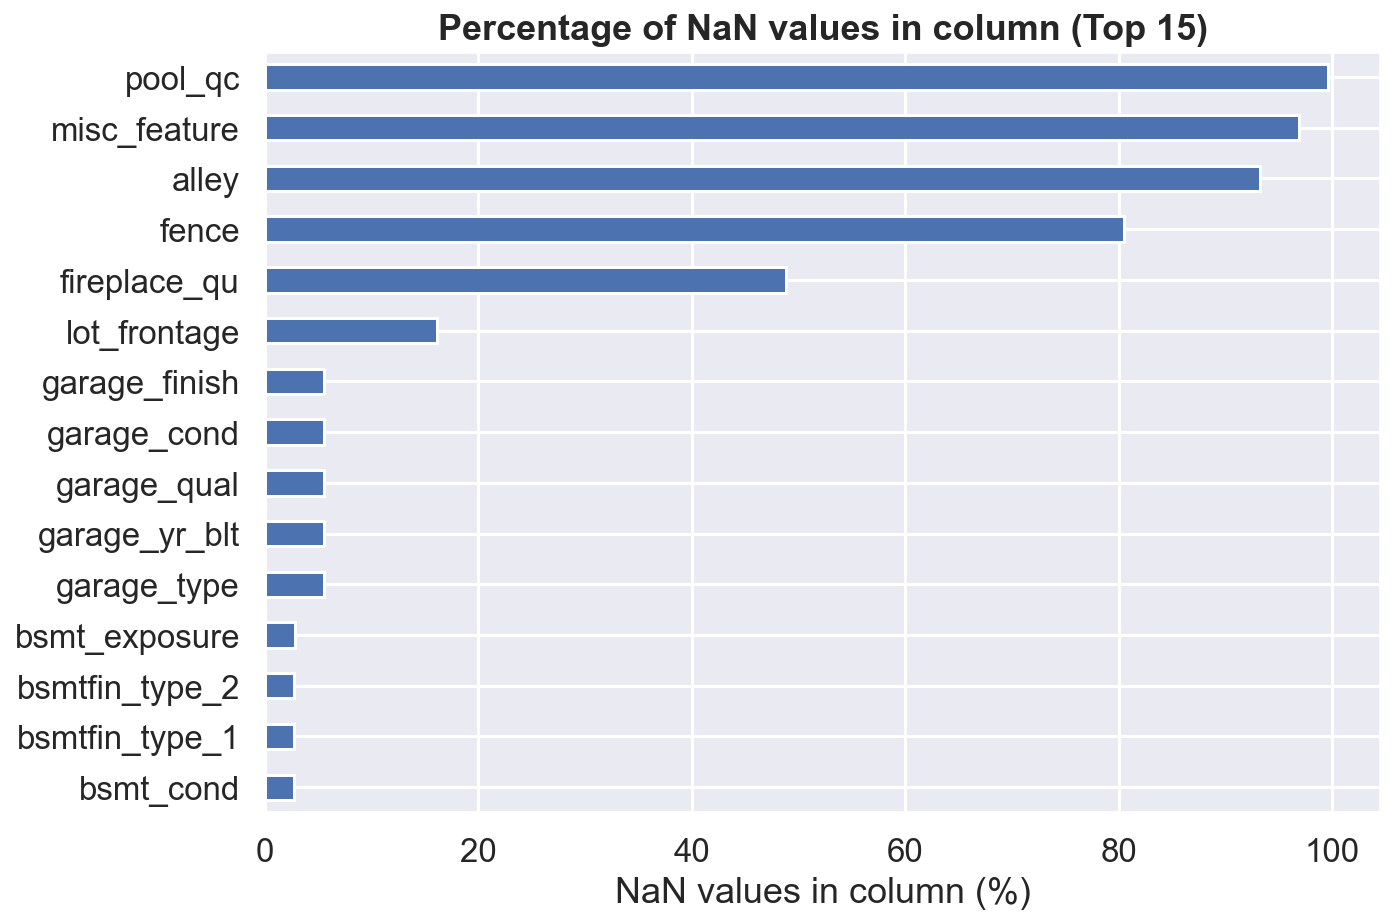

In [18]:
# Gets the percentage of NaN values in each column
isna_pct = train.isna().sum() / train.shape[0] * 100

# Plots a horizontal bar chart of the values
ax = (isna_pct).sort_values(ascending=True).tail(15).plot(kind='barh', figsize=(10,7))
ax.set_xlabel('NaN values in column (%)')
ax.set_title("Percentage of NaN values in column (Top 15)", fontweight="bold");

A graphical interpretation of where the values are in the dataset:

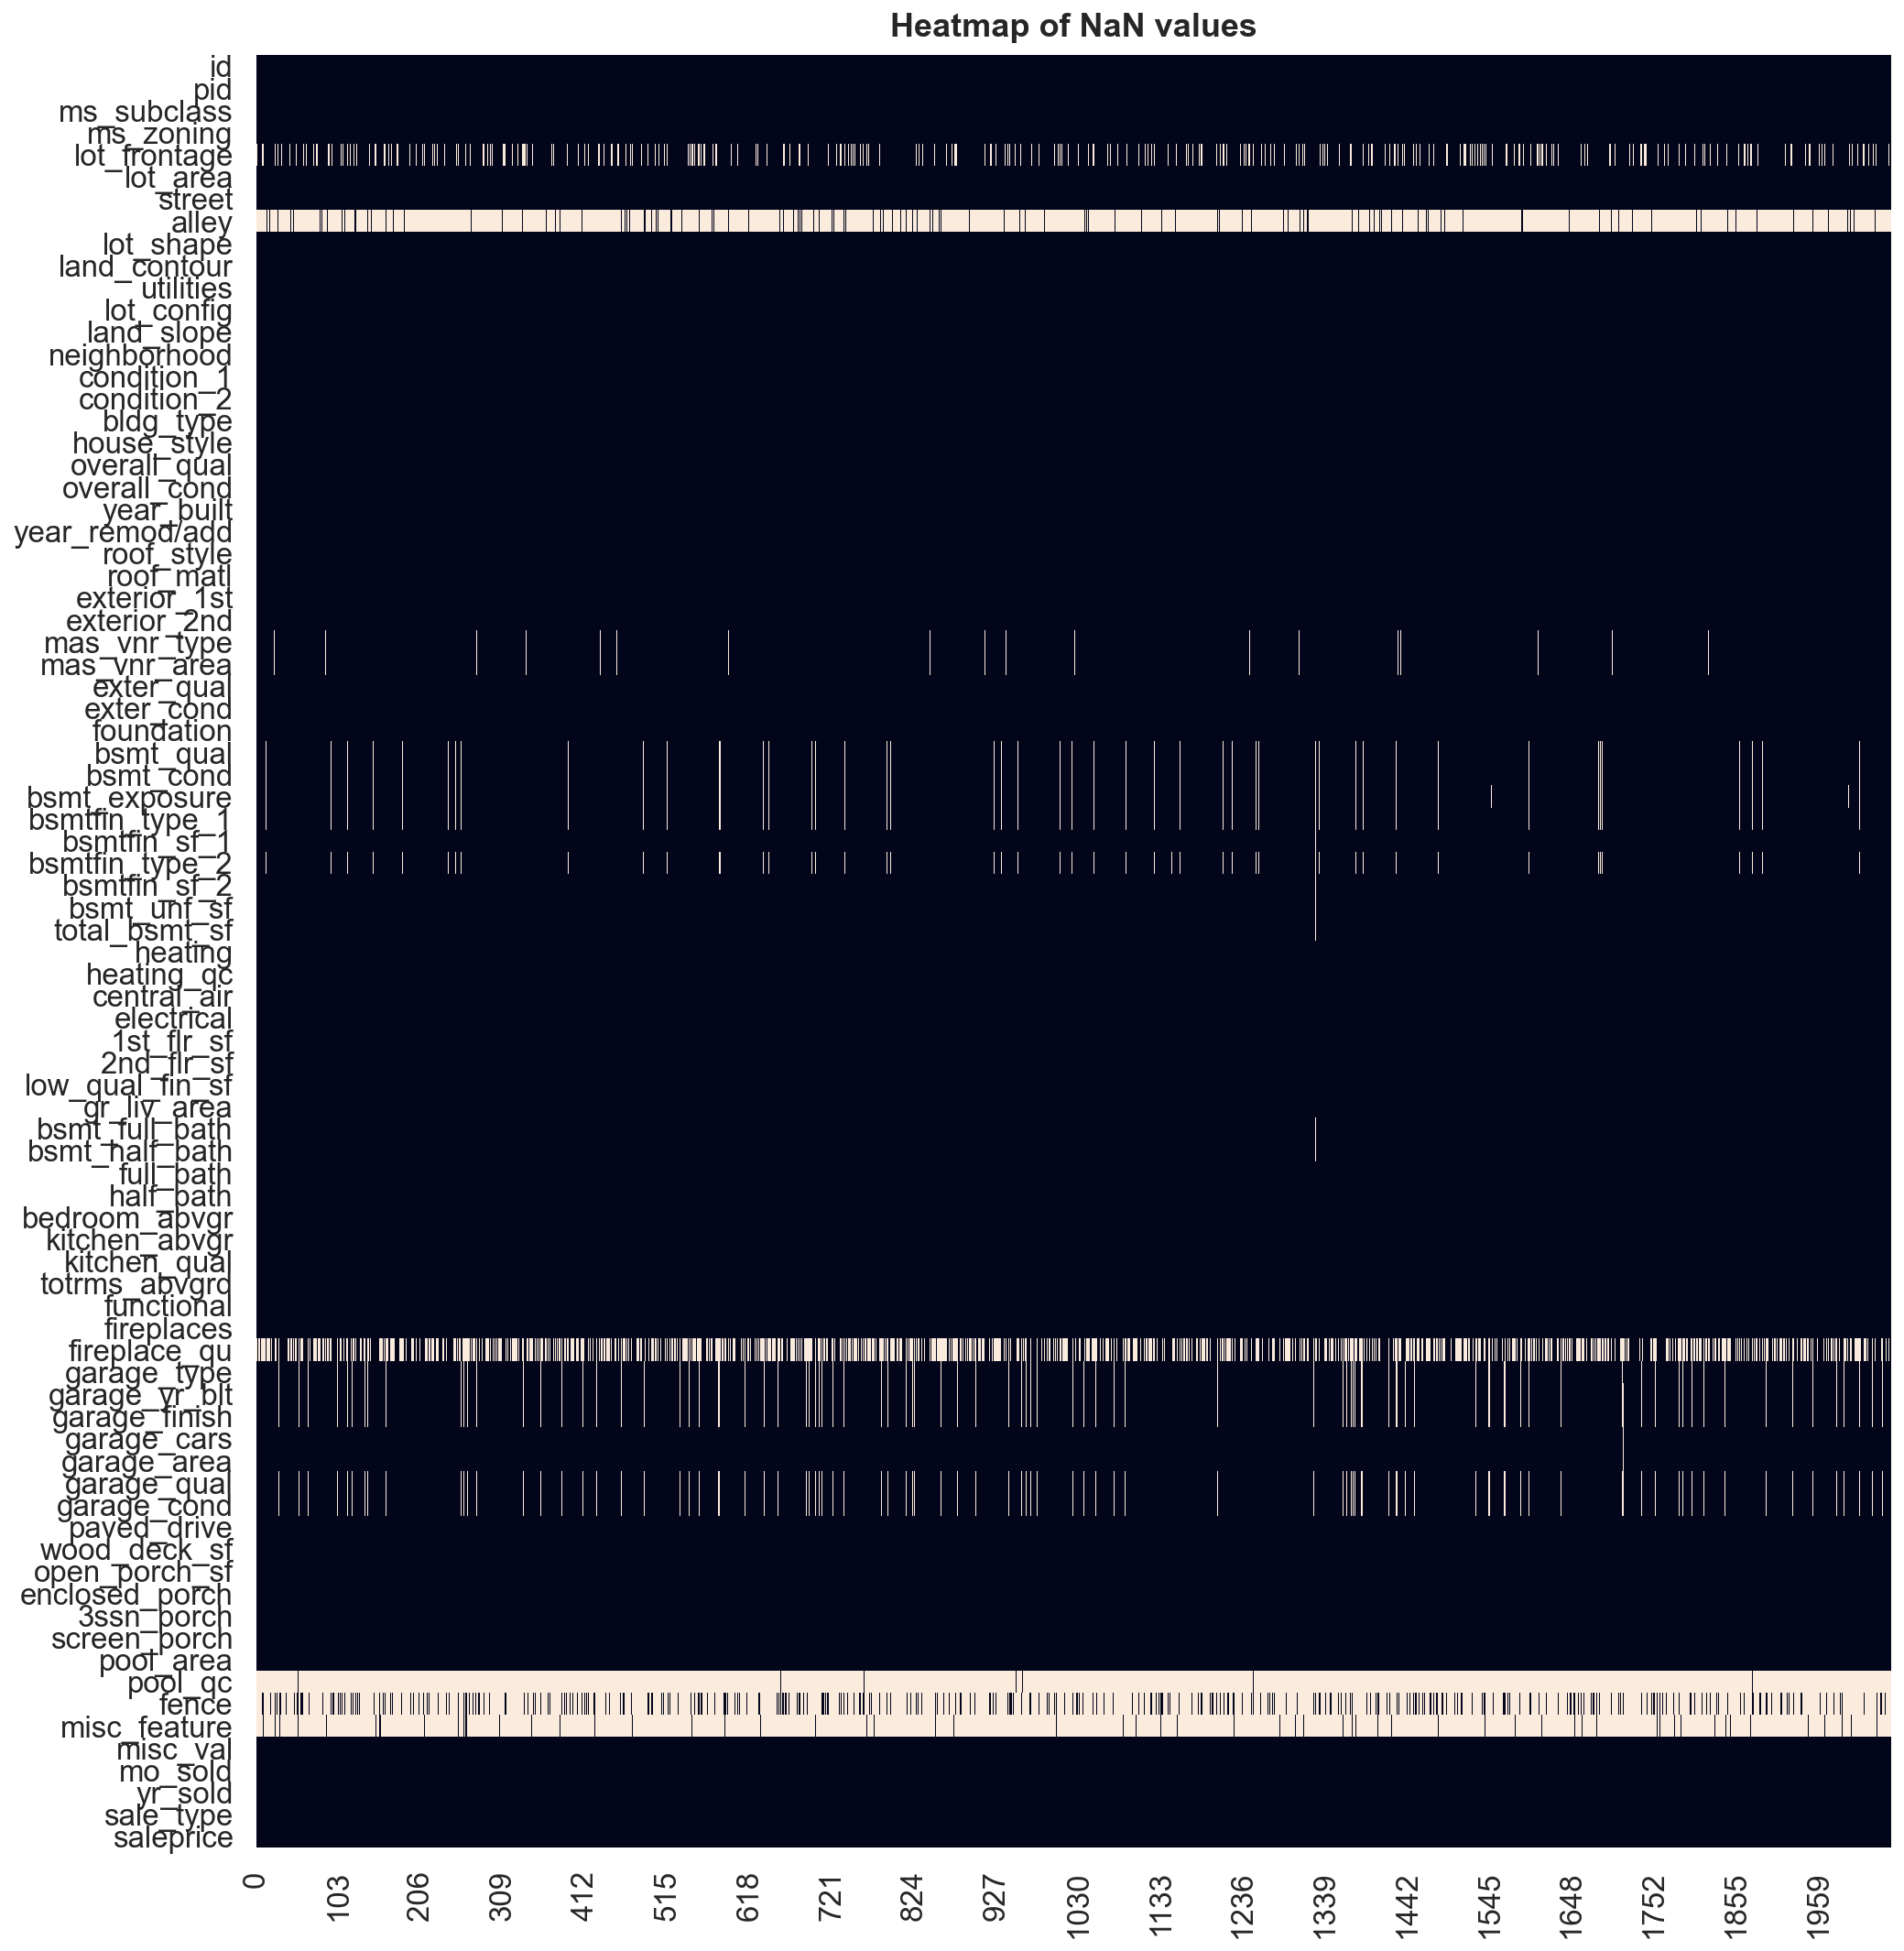

In [19]:
g = sns.heatmap(train.T.isna(), yticklabels=True, cbar=None)
g.figure.set_size_inches(16, 18)
g.set_title('Heatmap of NaN values',
            weight='bold',
            pad=10);

The NaN values appear to be spread out randomly, although for some columns, if there are NaNs in them, there are also NaNs in the adjacent columns (e.g. garage-related columns).

## Columns with a very high proportion of NaN values 

The first column we will look at is at `'pool_qc'` (pool quality). In the documentation, it is stated that NA values indicate 'No Pool'. For the `'misc_feature'`, `'alley'`, `'fence'` and `'fireplace_qu'` (fireplace quality) columns, the NA values also mean the absence of that feature.

As there is very little variability in the values for the following columns with a high proportion of NaN values, they will be dropped. They are `pool_qc`, `misc_feature`, `alley` and `fence`.

In [20]:
train.drop(columns='pool_qc', inplace=True)
train.drop(columns='misc_feature', inplace=True)
train.drop(columns='alley', inplace=True)
train.drop(columns='fence', inplace=True)

The following are the percentages for each value in `'fireplace_qu'`.

In [21]:
train['fireplace_qu'].value_counts() / train.shape[0] * 100

Gd    25.427038
TA    19.863348
Fa     2.879453
Po     1.512933
Ex     1.512933
Name: fireplace_qu, dtype: float64

Since there is more variability here, the NaNs will be labelled as a new category, 'NoFireplace' for no fireplace.

In [22]:
train['fireplace_qu'] = train['fireplace_qu'].fillna('NoFireplace')

## List of numerical columns with NaN values

The following is the list of NaN values where the datatype of the column is numerical.

In [23]:
train[train.loc[:, train.isna().any()].select_dtypes(exclude='object').columns].isna().sum()

lot_frontage      330
mas_vnr_area       22
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_full_bath      2
bsmt_half_bath      2
garage_yr_blt     114
garage_cars         1
garage_area         1
dtype: int64

## NaN values in `lot_frontage` 

According to the data documentation, this is a continuous variable that represents the "Linear feet of street connected to property". Below is the frequency distribution of the values across the spectrum of unique values.

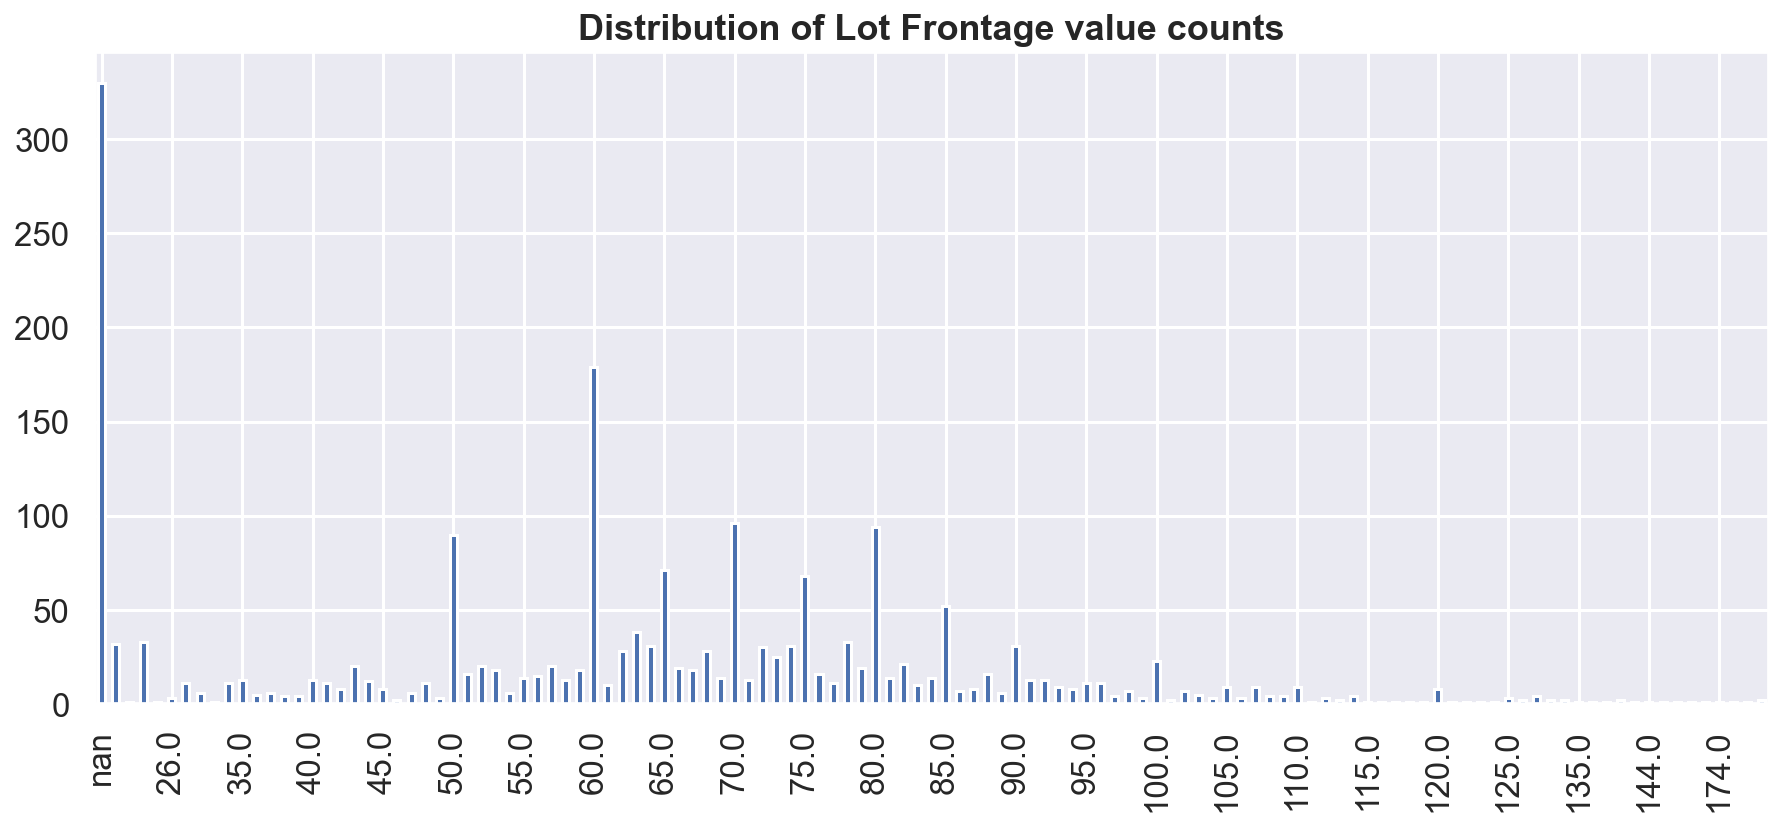

In [24]:
# Gets a list of the value counts in `lot_frontage`, ordered by index (the unique values), include NaN
lot_frontage_isna = train['lot_frontage'].value_counts(dropna=False).sort_index(na_position='first')

# Plots a bar chart of the aforementioned list
ax = lot_frontage_isna.plot(kind='bar', figsize=(15,6))
ax.set_title("Distribution of Lot Frontage value counts", fontweight="bold")

# Sets an interval between each x-tick instead of labelling every single x_value
loc = plticker.MultipleLocator(base=5)
ax.xaxis.set_major_locator(loc);

NaN values are of a much higher number than the rest of the value counts. Let's check the lowest value for lot frontage that is not NaN:

In [25]:
lot_frontage_isna.head()

NaN     330
21.0     32
22.0      1
24.0     33
25.0      1
Name: lot_frontage, dtype: int64

The lowest available value is 21 feet. This is congruent with there being a regulation for minimum lot frontage in the City of Ames Municipal code, as mentioned in the [Background and Research](#Background-and-Research). Thus, it would not be reasonable to assume that the NaN values can be taken as 0. Also, in the distribution, the NaN category seems to be too highly overrepresented for us to assume that we can simply replace the NaNs with 0. 

Possible imputation values (mean, median, mode) are as follows:

In [26]:
train['lot_frontage'].mean()

68.98312972658522

In [27]:
train['lot_frontage'].median()

68.0

In [28]:
train['lot_frontage'].mode()

0    60.0
dtype: float64

However, another option is to group the data by `lot_config` (Lot configuration), since it is possibly the closest proxy to the actual lot frontage.

In [29]:
train['lot_frontage'].groupby(train['lot_config']).median()

lot_config
Corner     80.0
CulDSac    50.0
FR2        60.0
FR3        80.0
Inside     66.0
Name: lot_frontage, dtype: float64

In [30]:
train['lot_frontage'].groupby(train['lot_config']).mean()

lot_config
Corner     83.064286
CulDSac    55.228571
FR2        60.836735
FR3        87.000000
Inside     66.906250
Name: lot_frontage, dtype: float64

The values are quite different for each grouping. Hence, it could be better to use the grouped values instead. The median will be selected, since it is less sensitive to outliers. The values are replaced as follows:

In [31]:
# Replaces the NaN value in the DataFrame when the conditions are met 
# E.g. when the lot frontage is NaN and the lot config is 'Corner', replace the NaN with 75.0
train.loc[(train['lot_frontage'].isna()) & (train['lot_config'] == 'Corner'), 'lot_frontage'] = 75.0
train.loc[(train['lot_frontage'].isna()) & (train['lot_config'] == 'CulDSac'), 'lot_frontage'] = 72.0
train.loc[(train['lot_frontage'].isna()) & (train['lot_config'] == 'FR2'), 'lot_frontage'] = 63.5
train.loc[(train['lot_frontage'].isna()) & (train['lot_config'] == 'FR3'), 'lot_frontage'] = 73.0
train.loc[(train['lot_frontage'].isna()) & (train['lot_config'] == 'Inside'), 'lot_frontage'] = 67.0

## NaN values in `mas_vnr_area` 

This is a continuous variable that represents the "Masonry veneer area in square feet" according to the data documentation. Below is the frequency distribution of the values.

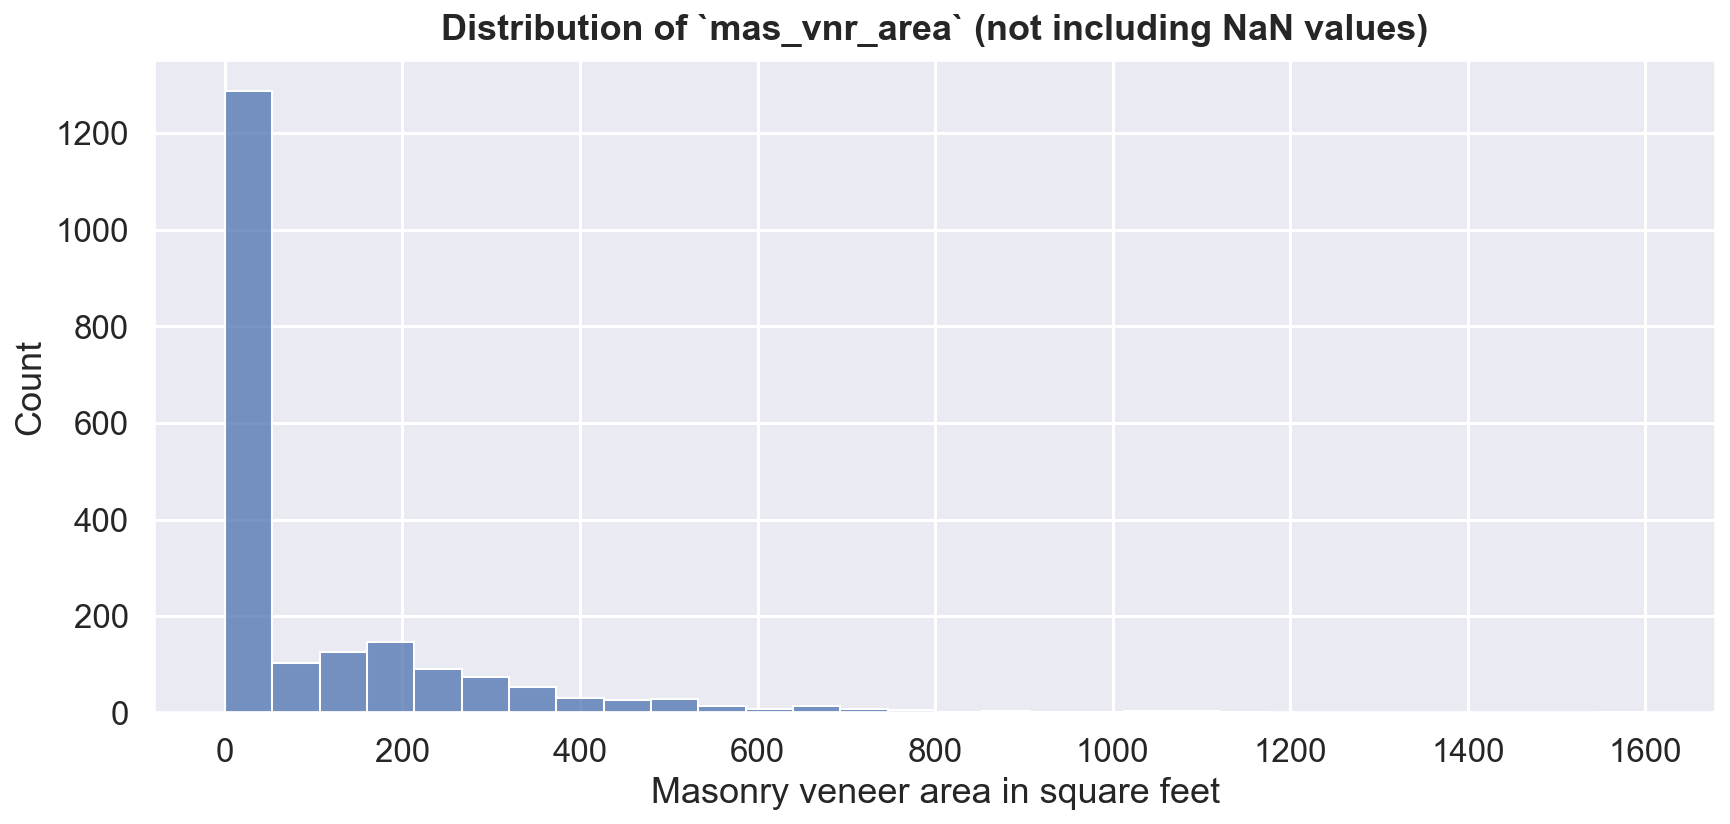

In [32]:
# Generates a histogram which does not inclue NaNs
g = sns.histplot(data=train, x='mas_vnr_area', bins=30)
g.figure.set_size_inches(14, 6)
g.set_xlabel('Masonry veneer area in square feet')
g.set_title('Distribution of `mas_vnr_area` (not including NaN values)', fontweight="bold", pad=10);

In [33]:
train['mas_vnr_area'].value_counts().head()

0.0      1215
120.0      11
176.0      10
200.0      10
210.0       9
Name: mas_vnr_area, dtype: int64

According to the value counts, 0 is the most common value.

In [34]:
train['mas_vnr_area'].isna().sum()

22

There are 22 NaN values. 

In [35]:
train[train['mas_vnr_area'].isna()].equals(train[train['mas_vnr_type'].isna()])

True

From the test above, the rows in the DataFrame where the Masonry veneer area is NaN are equal to the rows where the Masonry veneer type is NaN. 

In [36]:
train['mas_vnr_type'].value_counts(dropna=False)

None       1217
BrkFace     630
Stone       167
NaN          22
BrkCmn       13
Name: mas_vnr_type, dtype: int64

'None' is the most common value here - similar to the Masonry veneer area. We are unable to impute any values for the area based on the Masonry veneer type. Given that it is overwhelmingly common for the houses to have no masonry, the values will be imputed as 0. The values are imputed as follows:

In [37]:
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0.0)

Later on in the process, `'mas_vnr_type'` will be imputed accordingly. 

## NaN values in numerical basement-related columns 

To refresh, there is the list of the numerical columns with NaN values:

In [38]:
train[train.loc[:, train.isna().any()].select_dtypes(exclude='object').columns].isna().sum()

bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_full_bath      2
bsmt_half_bath      2
garage_yr_blt     114
garage_cars         1
garage_area         1
dtype: int64

It seems that two rows comprise the missing values for all the numerical basement-related columns.

In [39]:
train[train['bsmt_full_bath'].isna()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NoFireplace,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,79000


In the documentation for the categorical basement-related columns like `bsmt_qual` and `bsmt_cond`, NA values indicate no basement. Assuming this holds true, we can impute 0s for these columns since the values in the categorical basement-related columns are NaNs. 

In [40]:
bsmt_num_null = ['bsmtfin_sf_1',
                 'bsmtfin_sf_2',
                 'bsmt_unf_sf',
                 'total_bsmt_sf',
                 'bsmt_full_bath',
                 'bsmt_half_bath']

for col in bsmt_num_null: 
    train[col] = train[col].fillna(0.0)

Now, we can do the check for the total basement square feet. 

In [41]:
train[(train['bsmtfin_sf_1']  + train['bsmtfin_sf_2'] + train['bsmt_unf_sf']) != train['total_bsmt_sf']]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


The data is clean with respect to this. 

## NaN values in numerical garage-related columns

In [42]:
train[train['garage_cars'].isna()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NoFireplace,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,0,3,2007,WD,150909


There is one row with NaN values, and the `garage_area` and `garage_cars` are both NaNs. According to the data documentation, houses with no garage will have a `garage_type` of NA. However, in this case, the `garage_type` is 'Detchd'. The rest of the garage-related columns are NaNs. This is an inconsistency. We do not know if 'Detchd' is the error, or the NaN values in `garage_cars` and `garage_area`. The row will be dropped. 

In [43]:
train.dropna(subset=['garage_cars'], inplace=True)

Next, we have the `garage_yr_blt` column.

In [44]:
train[train['garage_yr_blt'].isna()].equals(train[train['garage_type'].isna()])

True

The test above shows that the rows in the DataFrame where the garage_yr_blt is NaN are equal to the rows where the garage_type is NaN. This would mean we have to replace the year with a placeholder like 'None', which will lead to a mixture of datatypes in the column. Alternatively, the NaNs could be converted to 0s, but this would mean severe skewing of the distribution as the numbers jump from 0 to 1895-2010. 

We will first replace the NaNs with '0.0'. However, this issue will be addressed during feature engineering if we manage to create features that are more representative of `garage_yr_blt`.

In [45]:
train['garage_yr_blt'] = train['garage_yr_blt'].fillna(0)

This is the list of numerical columns with NaN values:

In [46]:
train[train.loc[:, train.isna().any()].select_dtypes(exclude='object').columns].isna().sum()

Series([], dtype: float64)

All the NaN values have been cleared.

## List of categorical columns with NaN values 

The following is the list of NaN values where the datatype of the column is not numerical.

In [47]:
train[train.loc[:, train.isna().any()].select_dtypes(include='object').columns].isna().sum()

mas_vnr_type       22
bsmt_qual          55
bsmt_cond          55
bsmt_exposure      58
bsmtfin_type_1     55
bsmtfin_type_2     56
garage_type       113
garage_finish     113
garage_qual       113
garage_cond       113
dtype: int64

## NaN values in `mas_vnr_type` 

As discussed for `mas_vnr_area`, we are assuming that the missing values are 'None' since it is the overwhelmingly common value. The values will be replaced:

In [48]:
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('None')

## NaN values in categorical basement-related columns 

Here is the list again:

In [49]:
train[train.loc[:, train.isna().any()].select_dtypes(include='object').columns].isna().sum()

bsmt_qual          55
bsmt_cond          55
bsmt_exposure      58
bsmtfin_type_1     55
bsmtfin_type_2     56
garage_type       113
garage_finish     113
garage_qual       113
garage_cond       113
dtype: int64

According to the data documentation, NA values indicate no basement. However, there are a number of differences in the value counts. We will go through the columns one by one. 

First, we confirm the ones that are similar (55 NaN values):

In [50]:
train[train['bsmt_qual'].isna()].equals(train[train['bsmt_cond'].isna()])

True

The test above shows that the rows in the DataFrame where the `bsmt_qual` is NaN are equal to the rows where the `bsmt_cond` is NaN. 

In [51]:
train[train['bsmt_qual'].isna()].equals(train[train['bsmtfin_type_1'].isna()])

True

The test above shows that the rows in the DataFrame where the `bsmt_qual` is NaN are equal to the rows where the `bsmtfin_type_1` is NaN. 

Hence, all these rows are consistent with each other. 

Next, we check the ones with different NaN counts (55 values vs. 56 or 58 values)

In [52]:
train[(train['bsmt_exposure'].isna()) & (train['bsmt_qual'].notna())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1456,1797,528458090,60,FV,81.0,10411,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NoFireplace,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,192500


Here we can see 3 rows where the basement is present (according to the other basement-related rows) but the basement exposure is NaN. These 3 rows will be dropped as the number of rows is small, and we want to avoid guesswork as much as we can.

In [53]:
train.drop(train[(train['bsmt_exposure'].isna()) & (train['bsmt_qual'].notna())].index, inplace=True)

Below, we can see a row where the basement is present, but the `bsmtfin_type_2` is NaN. However, `bsmtfin_sf_2` is not zero, hence the basement should have a finishing type. 

In [54]:
train[(train['bsmtfin_type_2'].isna()) & (train['bsmt_qual'].notna())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1147,445,528142130,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,0,10,2009,WD,284000


The row will be dropped as well. 

In [55]:
train.drop(train[(train['bsmtfin_type_2'].isna()) & (train['bsmt_qual'].notna())].index, inplace=True)

Now, referring to the list of categorical columns with NaNs:

In [56]:
train[train.loc[:, train.isna().any()].select_dtypes(include='object').columns].isna().sum()

bsmt_qual          55
bsmt_cond          55
bsmt_exposure      55
bsmtfin_type_1     55
bsmtfin_type_2     55
garage_type       113
garage_finish     113
garage_qual       113
garage_cond       113
dtype: int64

The remaining NaN values will be filled with 'NoBasement' to indicate 'No Basement':

In [57]:
bsmt_cat_null = ['bsmt_qual',
                 'bsmt_cond',
                 'bsmt_exposure',
                 'bsmtfin_type_1',
                 'bsmtfin_type_2',]

for col in bsmt_cat_null: 
    train[col] = train[col].fillna('NoBasement')

## NaN values in categorical garage-related columns

According to the data documentation, NA values indicate no garage. Referring to the list of categorical columns with NaNs:

In [58]:
train[train.loc[:, train.isna().any()].select_dtypes(include='object').columns].isna().sum()

garage_type      113
garage_finish    113
garage_qual      113
garage_cond      113
dtype: int64

In [59]:
train[train['garage_finish'].isna()].equals(train[train['garage_type'].isna()])

True

In [60]:
train[train['garage_qual'].isna()].equals(train[train['garage_type'].isna()])

True

In [61]:
train[train['garage_cond'].isna()].equals(train[train['garage_type'].isna()])

True

From the tests above, the rows in the DataFrame where the categorical garage-related columns are NaNs are consistent for all the columns. Thus, we can safely assume that there is no garage for these houses.

In [62]:
garage_cat_null = ['garage_type',
                   'garage_finish',
                   'garage_qual',
                   'garage_cond']

for col in garage_cat_null: 
    train[col] = train[col].fillna('NoGarage')

## Checking for NaN values

In [63]:
train.isna().sum().sum()

0

There are no more NaN values in the DataFrame.

## Converting categorical (ordinal) data to numerical format for modelling 

First, we make a list of the relevant columns:

In [64]:
cat_ord_cols = ['lot_shape',
                'utilities',
                'land_slope',
                'exter_qual',
                'exter_cond',
                'bsmt_qual',
                'bsmt_cond',
                'bsmt_exposure',
                'bsmtfin_type_1',
                'bsmtfin_type_2',
                'heating_qc',
                'electrical',
                'kitchen_qual',
                'functional',
                'fireplace_qu',
                'garage_finish',
                'garage_qual',
                'garage_cond',
                'paved_drive']

We then specify the mappings for the `OrdinalEncoder` in lists:

In [65]:
lot_shape_cats = ['Reg', 'IR1', 'IR2', 'IR3']
utilities_cats = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
land_slope_cats = ['Sev', 'Mod', 'Gtl']
exter_qual_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
exter_cond_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_qual_cats = ['NoBasement', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_cond_cats = ['NoBasement', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_exposure_cats = ['NoBasement', 'No', 'Mn', 'Av', 'Gd']
bsmtfin_type1_cats = ['NoBasement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
bsmtfin_type2_cats = ['NoBasement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
heating_qc_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
electrical_cats = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
kitchen_qual_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
functional_cats = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
fireplace_qu_cats = ['NoFireplace', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
garage_finish_cats = ['NoGarage', 'Unf', 'RFn', 'Fin']
garage_qual_cats = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
garage_cond_cats = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
paved_drive_cats = ['N', 'P', 'Y']

Then, these mapping lists are complied into a single list.

In [66]:
ordinal_cats = [lot_shape_cats, 
                utilities_cats, 
                land_slope_cats, 
                exter_qual_cats, 
                exter_cond_cats, 
                bsmt_qual_cats, 
                bsmt_cond_cats, 
                bsmt_exposure_cats, 
                bsmtfin_type1_cats, 
                bsmtfin_type2_cats, 
                heating_qc_cats, 
                electrical_cats, 
                kitchen_qual_cats, 
                functional_cats, 
                fireplace_qu_cats, 
                garage_finish_cats, 
                garage_qual_cats, 
                garage_cond_cats, 
                paved_drive_cats]

A copy of the DataFrame is made for reference and EDA purposes.

In [67]:
train_bef_ord = train.copy()

The `OrdinalEncoder`is called on the columns. 

In [68]:
enc = OrdinalEncoder(categories = ordinal_cats)
train[cat_ord_cols] = enc.fit_transform(train[cat_ord_cols])

In [69]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,72.0,13517,Pave,1.0,Lvl,3.0,CulDSac,2.0,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3.0,2.0,CBlock,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,4.0,Y,4.0,725,754,0,1479,0.0,0.0,2,1,3,1,3.0,6,7.0,0,0.0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,2.0,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,1.0,Lvl,3.0,CulDSac,2.0,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3.0,2.0,PConc,4.0,3.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,4.0,Y,4.0,913,1209,0,2122,1.0,0.0,2,1,4,1,3.0,8,7.0,1,3.0,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,2.0,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0.0,Lvl,3.0,Inside,2.0,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,3.0,CBlock,3.0,3.0,1.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,2.0,Y,4.0,1057,0,0,1057,1.0,0.0,1,0,3,1,3.0,5,7.0,0,0.0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,2.0,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0.0,Lvl,3.0,Inside,2.0,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,2.0,PConc,4.0,3.0,1.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,3.0,Y,4.0,744,700,0,1444,0.0,0.0,2,1,3,1,2.0,7,7.0,0,0.0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,2.0,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,1.0,Lvl,3.0,Inside,2.0,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2.0,2.0,PConc,2.0,4.0,1.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,2.0,Y,4.0,831,614,0,1445,0.0,0.0,2,0,3,1,2.0,6,7.0,0,0.0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,0.0,0,59,0,0,0,0,0,3,2010,WD,138500


The ordinal columns have been changed to numbers.

# Exploratory Data Analysis

## Summary statistics 

The summary statistics of the cleaned data are shown below.

In [70]:
train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2044.000000,2.044000e+03,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000
mean,1473.597358,7.136665e+08,57.052348,69.054061,10046.318004,0.403620,2.998532,1.947162,6.108121,5.563601,1971.634051,1984.118885,98.039628,2.404110,2.086106,3.487769,2.929061,1.631115,3.566536,440.818982,1.275930,47.865460,565.560665,1054.245108,3.155577,3.885029,1162.358611,328.911448,5.531800,1496.801859,0.427593,0.063112,1.575342,0.370841,2.843933,1.043053,2.515166,6.430528,6.842466,0.590020,1.760274,1869.141389,1.723581,1.774462,472.773973,2.803816,2.811155,1.833170,93.661937,47.255871,22.545499,2.600294,16.568004,2.406067,43.433953,6.220157,2007.776419,181354.879648
std,843.691647,1.886891e+08,42.872938,21.291968,6720.739049,0.566659,0.049449,0.244663,1.423718,1.105925,30.154994,21.036017,172.715577,0.587105,0.373397,0.902136,0.572973,1.077937,2.124600,454.512104,0.950661,164.950518,443.771177,438.753766,0.964501,0.403109,386.931878,425.687861,51.155263,494.627117,0.522749,0.251144,0.548837,0.501052,0.827576,0.210134,0.665392,1.550762,0.684517,0.638324,1.806408,452.916163,0.898910,0.764172,215.267957,0.719741,0.714546,0.535619,128.307945,65.736548,59.788356,25.272344,57.464256,37.846982,435.007394,2.744186,1.312022,79331.642114
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.750000,5.284582e+08,20.000000,60.000000,7500.000000,0.000000,3.000000,2.000000,5.000000,5.000000,1953.000000,1964.000000,0.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,219.000000,793.000000,2.000000,4.000000,879.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000,5.000000,7.000000,0.000000,0.000000,1957.000000,1.000000,1.000000,319.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1480.500000,5.354532e+08,50.000000,67.000000,9402.500000,0.000000,3.000000,2.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,2.000000,2.000000,4.000000,3.000000,1.000000,4.000000,368.000000,1.000000,0.000000,473.500000,994.000000,4.000000,4.000000,1092.500000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000

There are many features where the values are of single digits, either because they are ordinal ratings (like quality ratings in columns ending with `qual` or `qu`), or they are counts where the numbers are naturally small (like the number of fireplaces or number of cars the garage can hold). 

For features with higher values, they are in the units of square feet (e.g. `lot_area`, `pool area`, columns ending in `sf`), or pricing values (`saleprice`).

## Univariate analysis - numeric

Histograms of the numeric and ordinal variables were plotted. Shown below are selected variables of interest.

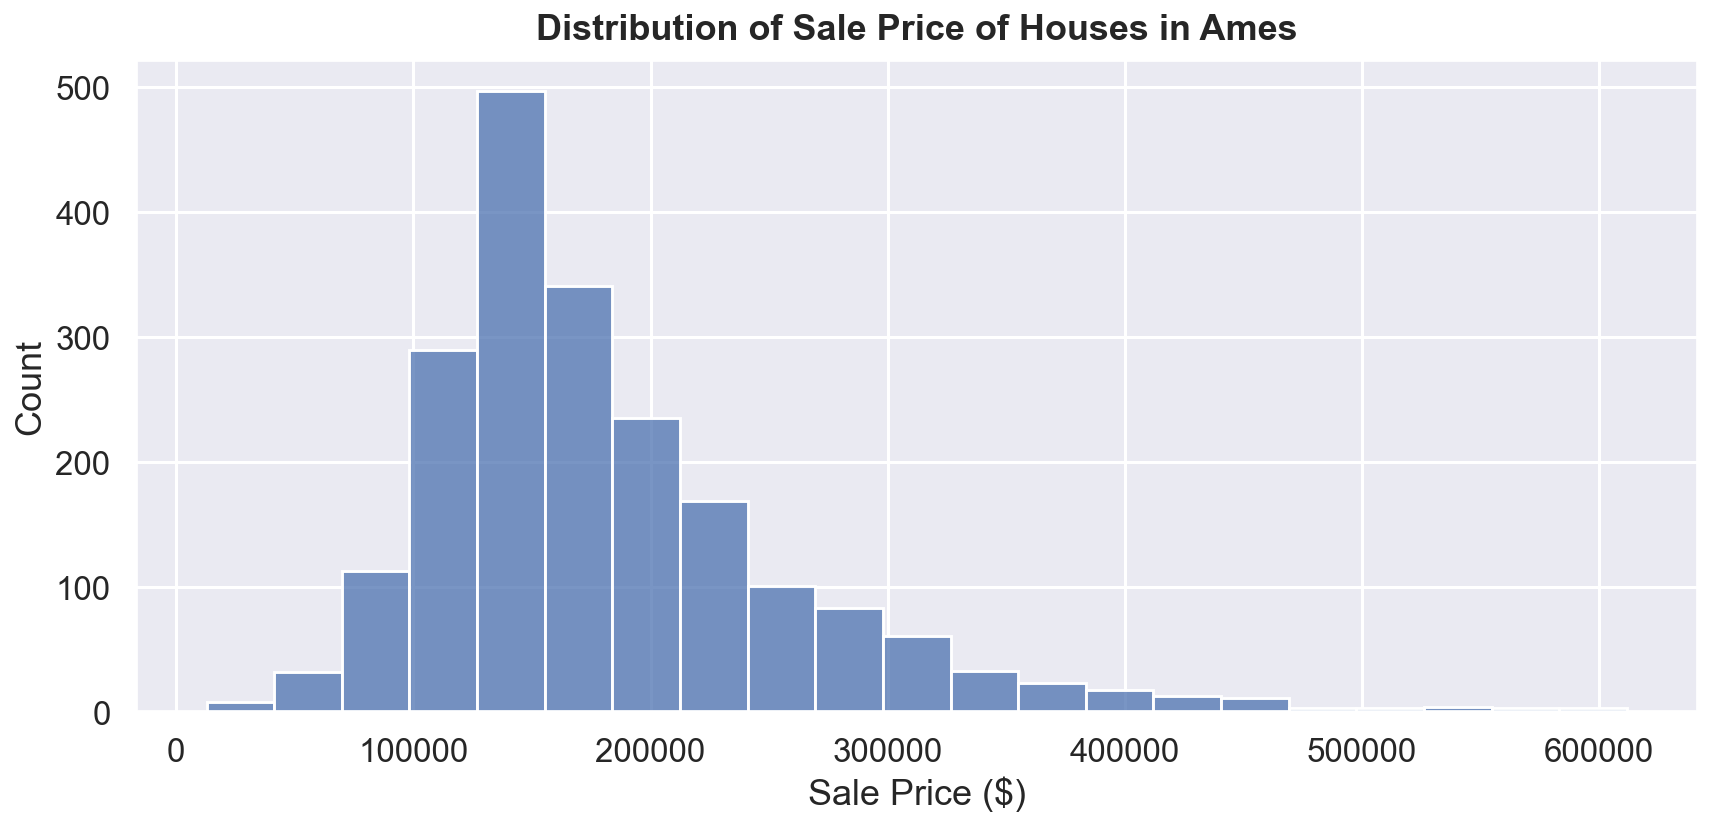

In [71]:
g = sns.histplot(data=train, x='saleprice', bins=21)
g.figure.set_size_inches(14, 6)
g.set_xlabel('Sale Price ($)')
g.set_title('Distribution of Sale Price of Houses in Ames', weight='bold', pad=10);

The distribution of sale price (the target variable) is positively skewed. This would mean that a number of houses with a high sale price are skewing the data. 

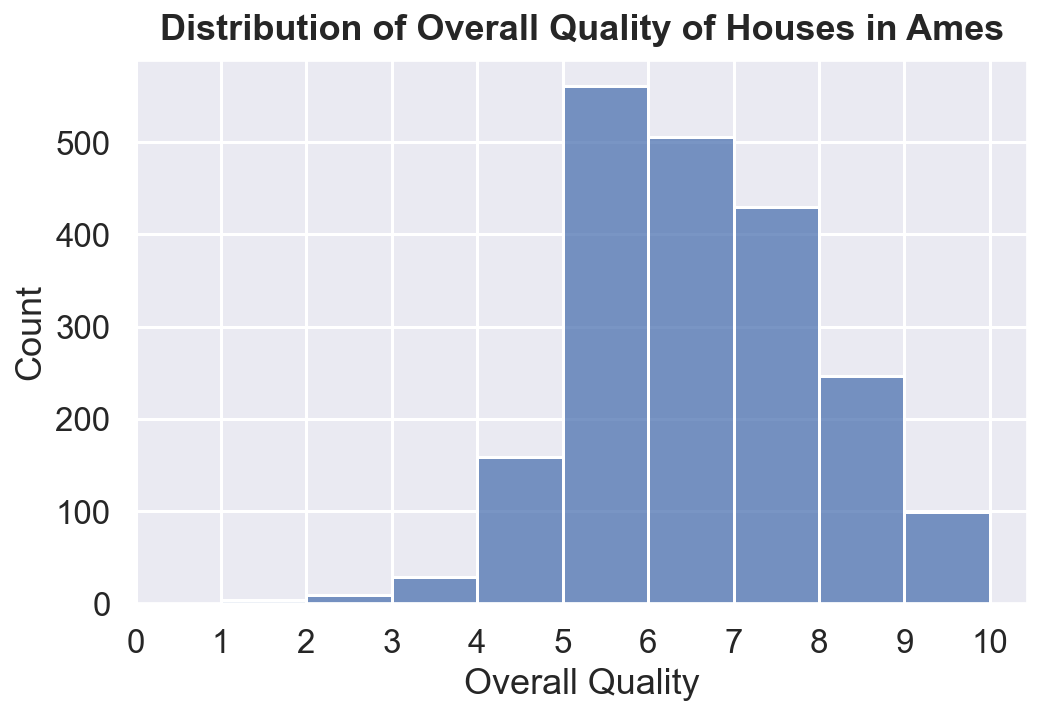

In [72]:
g = sns.histplot(data=train, x='overall_qual', bins=9)
g.figure.set_size_inches(8, 5)
g.set_xlabel('Overall Quality')
g.set_title('Distribution of Overall Quality of Houses in Ames', weight='bold', pad=10)
g.set_xticks(np.arange(0, 11, 1));

It seems like more houses have a quality rating above 6 than below. The interquartile range is betwen 5 to  7. A 5 is "Average", 6 is "Above Average" and 7 is "Good".

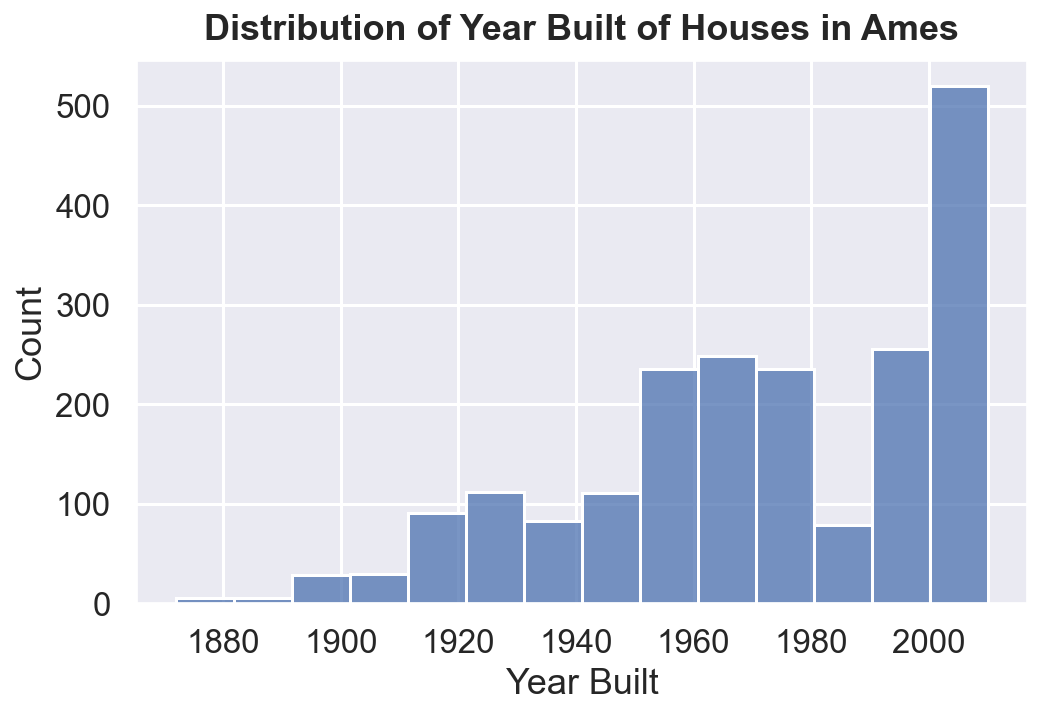

In [73]:
g = sns.histplot(data=train, x='year_built', bins=14)
g.figure.set_size_inches(8, 5)
g.set_xlabel('Year Built')
g.set_title('Distribution of Year Built of Houses in Ames', weight='bold', pad=10);

There was a spike in the number of houses built after the year 2000 among the houses sold. Newer houses could be more transacted than old ones. 

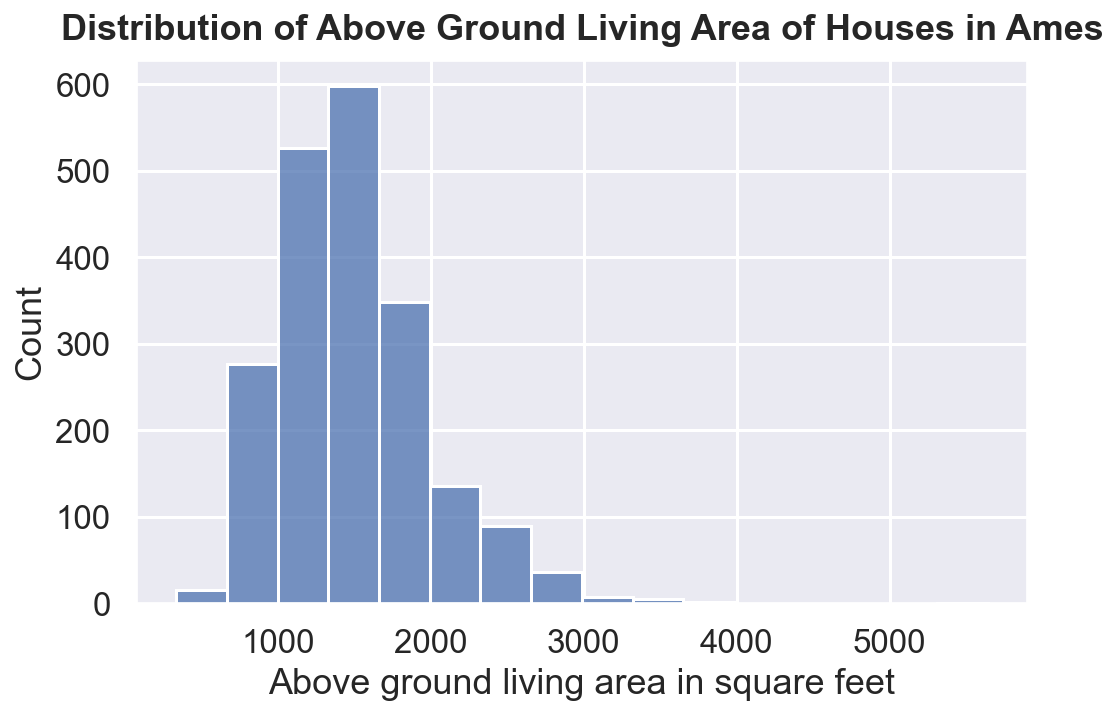

In [74]:
g = sns.histplot(data=train, x='gr_liv_area', bins=16)
g.figure.set_size_inches(8, 5)
g.set_xlabel('Above ground living area in square feet')
g.set_title('Distribution of Above Ground Living Area of Houses in Ames', weight='bold', pad=10);

This distribution is positively skewed. Some houses with a very large area exist among the transacted houses, skewing the distribution.

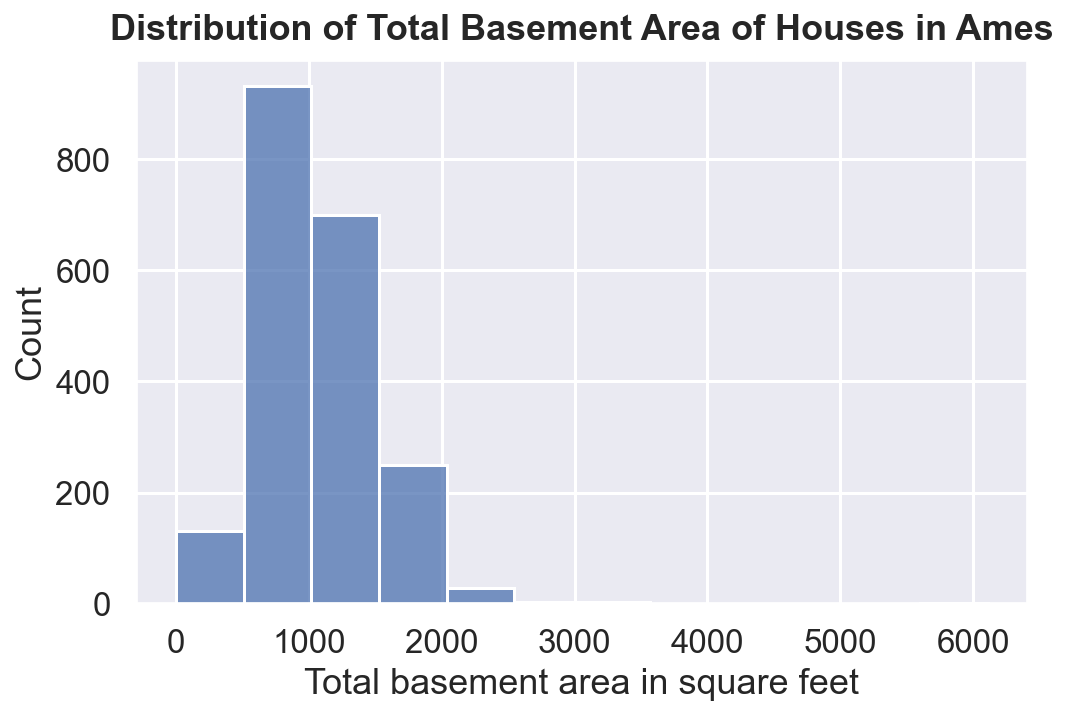

In [75]:
g = sns.histplot(data=train, x='total_bsmt_sf', bins=12)
g.figure.set_size_inches(8, 5)
g.set_xlabel('Total basement area in square feet')
g.set_title('Distribution of Total Basement Area of Houses in Ames', weight='bold', pad=10);

As with the above ground living area, the total basement area is positively skewed as well.

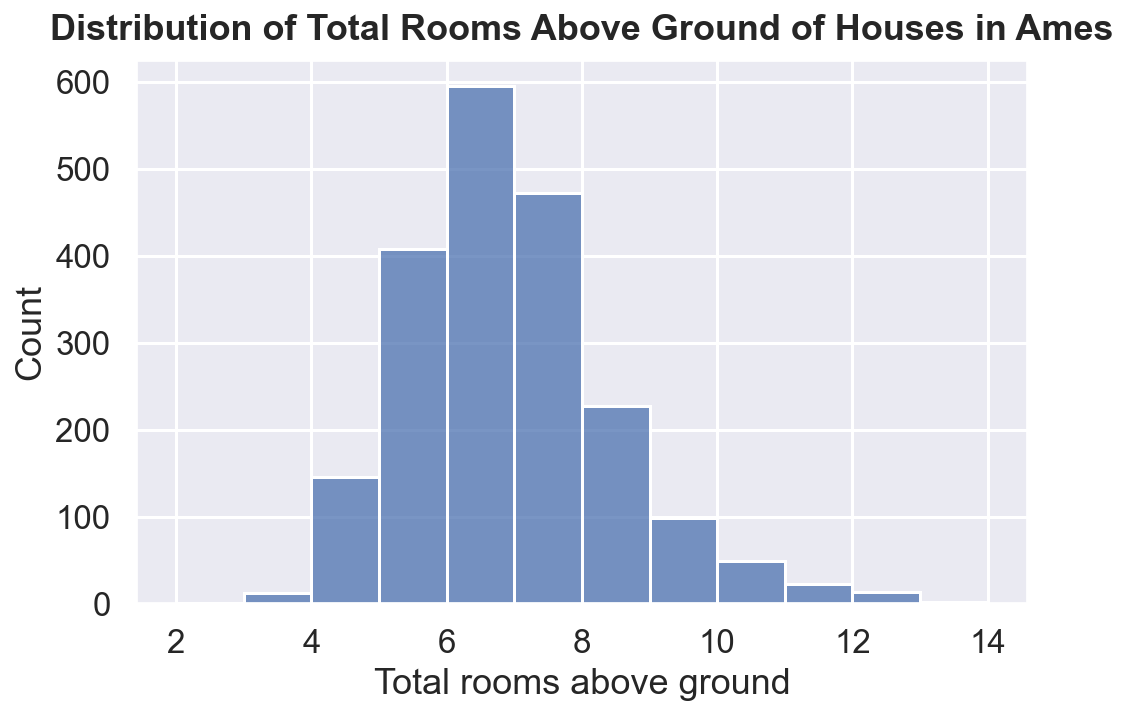

In [76]:
g = sns.histplot(data=train, x='totrms_abvgrd', bins=12)
g.figure.set_size_inches(8, 5)
g.set_xlabel('Total rooms above ground')
g.set_title('Distribution of Total Rooms Above Ground of Houses in Ames', weight='bold', pad=10);

Similar to the above ground living area, the total number of rooms above ground is positively skewed as well. However, the skewing is not as severe as for the above ground living area. 

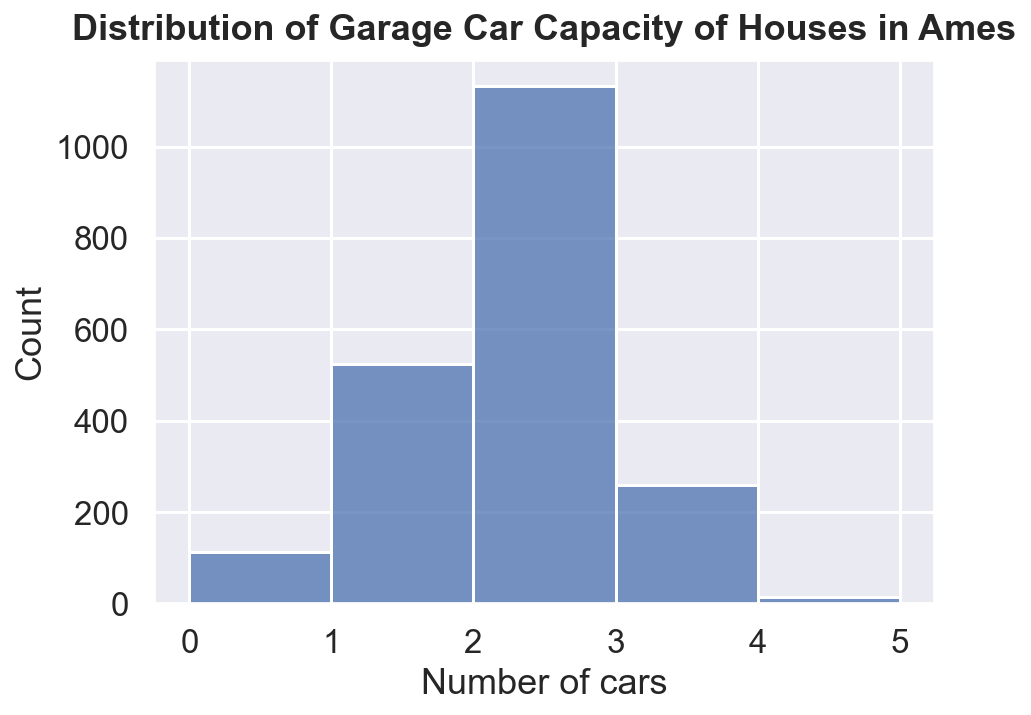

In [77]:
g = sns.histplot(data=train, x='garage_cars', bins=5)
g.figure.set_size_inches(7, 5)
g.set_xlabel('Number of cars')
g.set_title('Distribution of Garage Car Capacity of Houses in Ames', weight='bold', pad=10);

The median garage car capacity is 2. Few garages have a 5-car capacity.

## Univariate analysis - categorical

Countplots of the numeric and ordinal variables were plotted. Shown below are selected variables of interest.

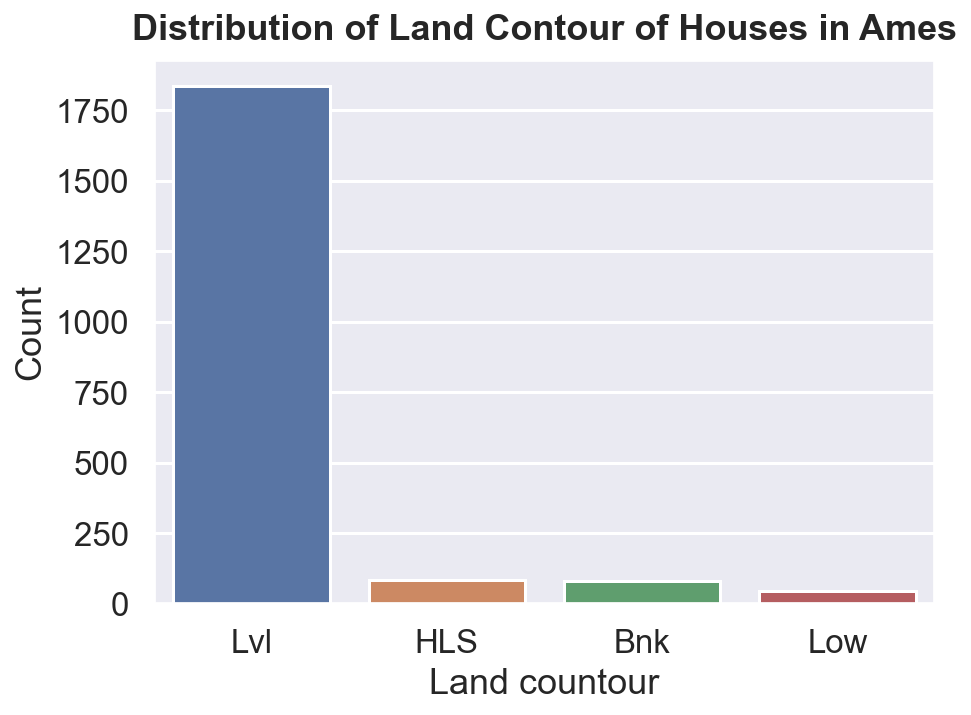

In [78]:
g = sns.countplot(x='land_contour', data=train)
g.figure.set_size_inches(7, 5)
g.set_xlabel('Land countour')
g.set_ylabel('Count')
g.set_title('Distribution of Land Contour of Houses in Ames', weight='bold', pad=10);

Most of the houses in Ames are on level ground. The remaining are, in order of frequency, on hillsides, banked land, or a depression in the land contour.

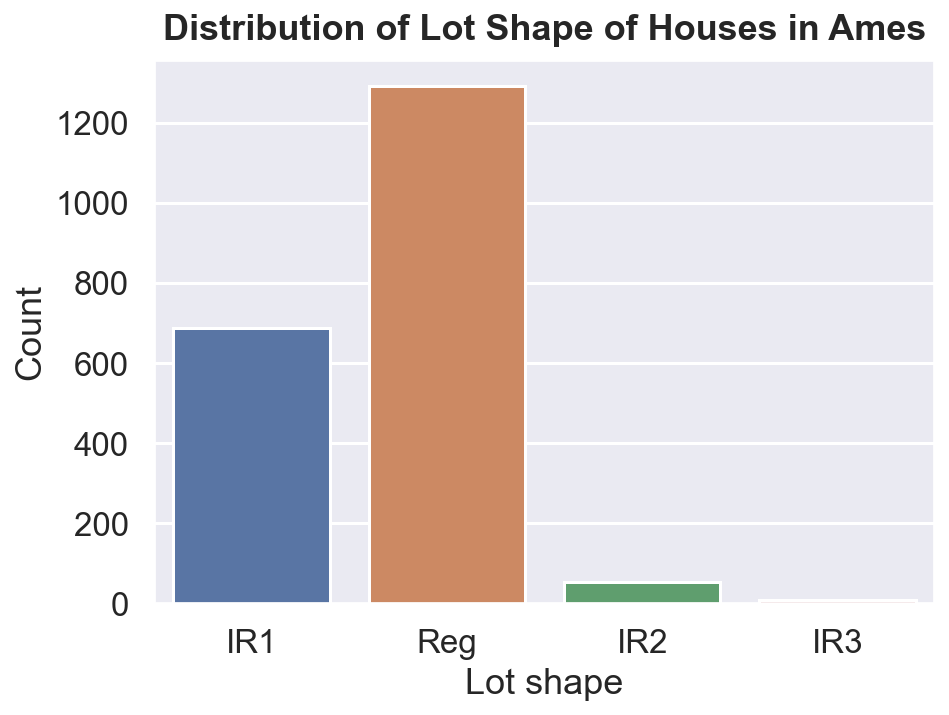

In [79]:
g = sns.countplot(x='lot_shape', data=train_bef_ord)
g.figure.set_size_inches(7, 5)
g.set_xlabel('Lot shape')
g.set_ylabel('Count')
g.set_title('Distribution of Lot Shape of Houses in Ames', weight='bold', pad=10);

Most of the houses have a regular lot shape, followed by slightly irregular (IR1), moderately irregular (IR2), and irregular(IR3).

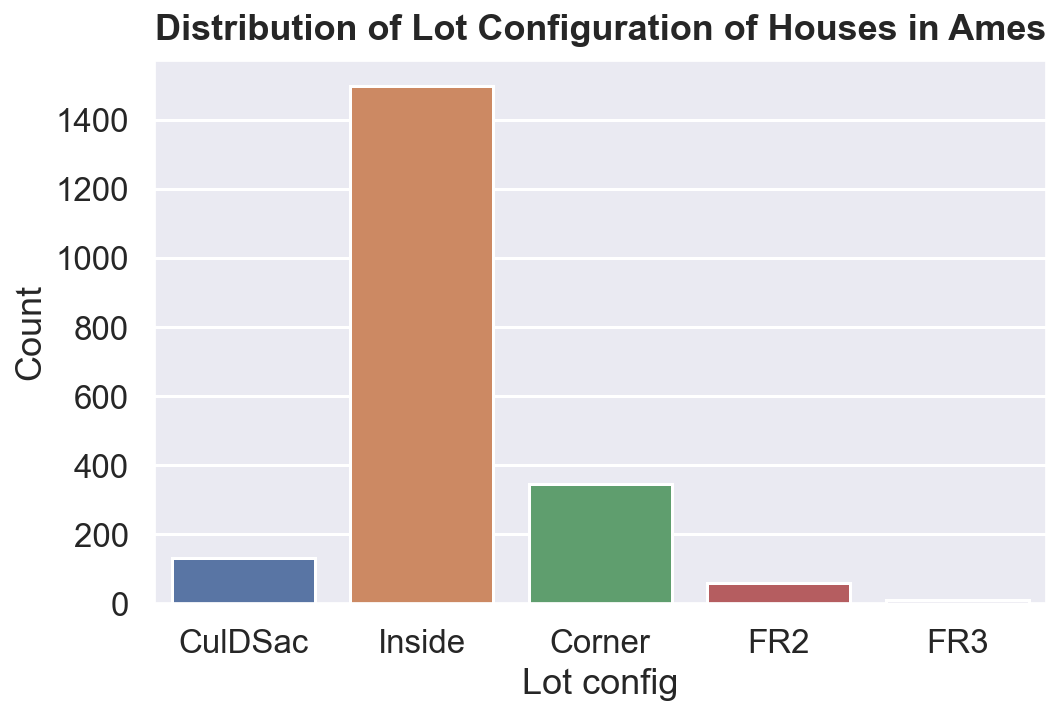

In [80]:
g = sns.countplot(x='lot_config', data=train)
g.figure.set_size_inches(8, 5)
g.set_xlabel('Lot config')
g.set_ylabel('Count')
g.set_title('Distribution of Lot Configuration of Houses in Ames', weight='bold', pad=10);

Most of the houses are on inside lots. This is followed by corner lots, lots which are cul-de-sacs (at the dead end of a road), lots with frontage on 2 sides of the property, and lots with frontage on 3 sides of the property.

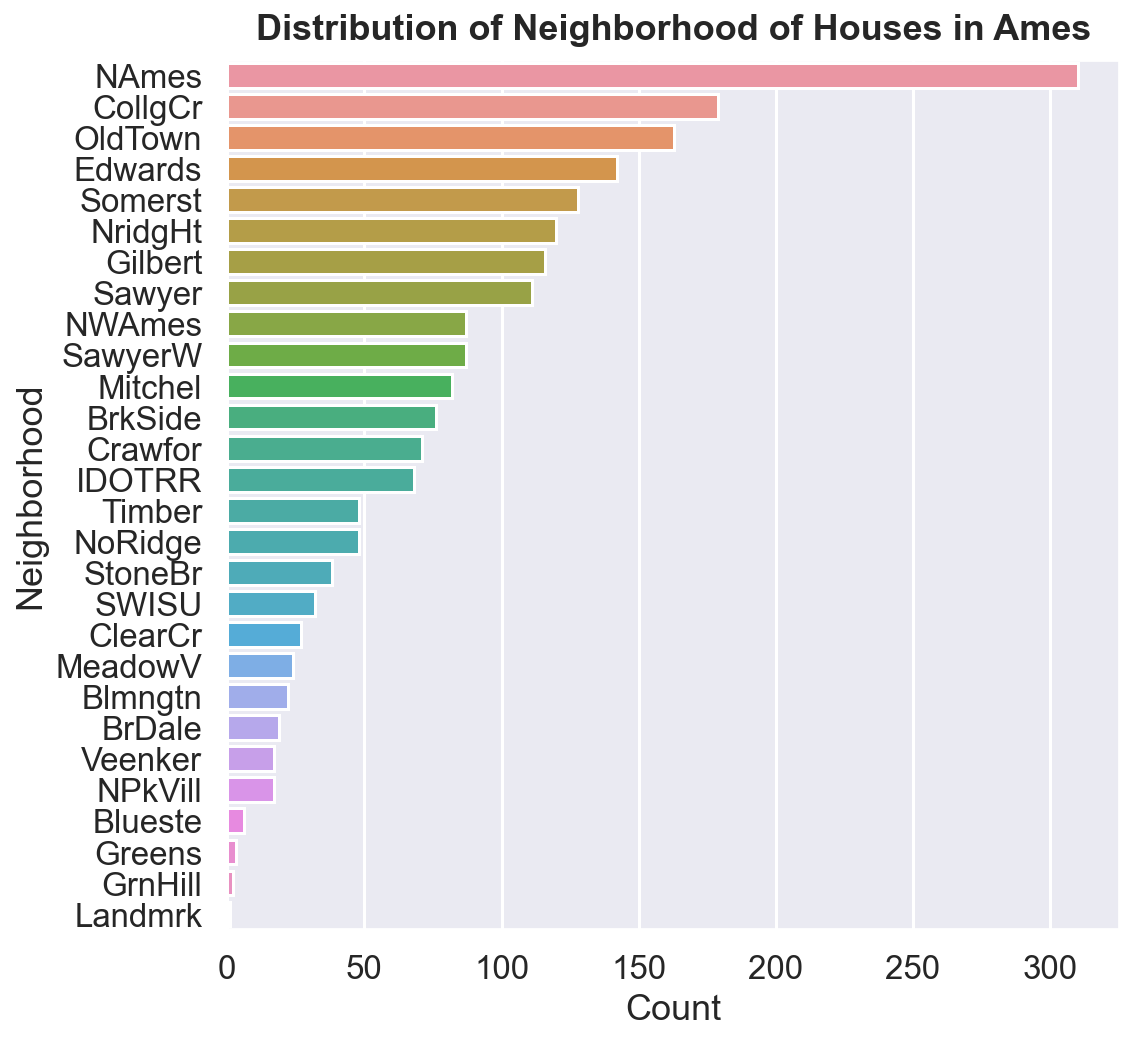

In [81]:
g = sns.countplot(y='neighborhood', 
                  data=train, 
                  order=train['neighborhood'].value_counts().sort_values(ascending=False).index)
g.figure.set_size_inches(8, 8)
g.set_xlabel('Count')
g.set_ylabel('Neighborhood')
g.set_title('Distribution of Neighborhood of Houses in Ames', weight='bold', pad=10);

North Ames has a particularly high count compared to the other neighbourhoods.

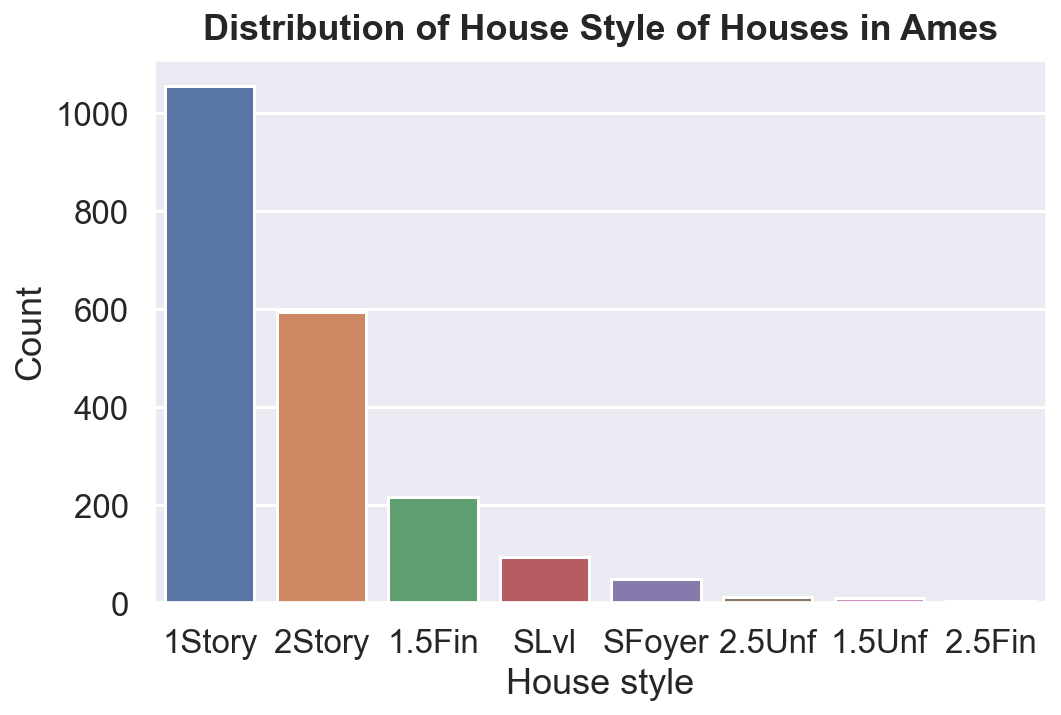

In [82]:
g = sns.countplot(x='house_style',
                  data=train,
                  order=train['house_style'].value_counts().sort_values(ascending=False).index)
g.figure.set_size_inches(8, 5)
g.set_xlabel('House style')
g.set_ylabel('Count')
g.set_title('Distribution of House Style of Houses in Ames', weight='bold', pad=10);

Most of the houses are of a single story. The categories with decimal points indicate houses that have half-stories (i.e. a smaller higher level of the house). Fin and Unf represent if the story was finished (renovations to make the area livable were completed). 

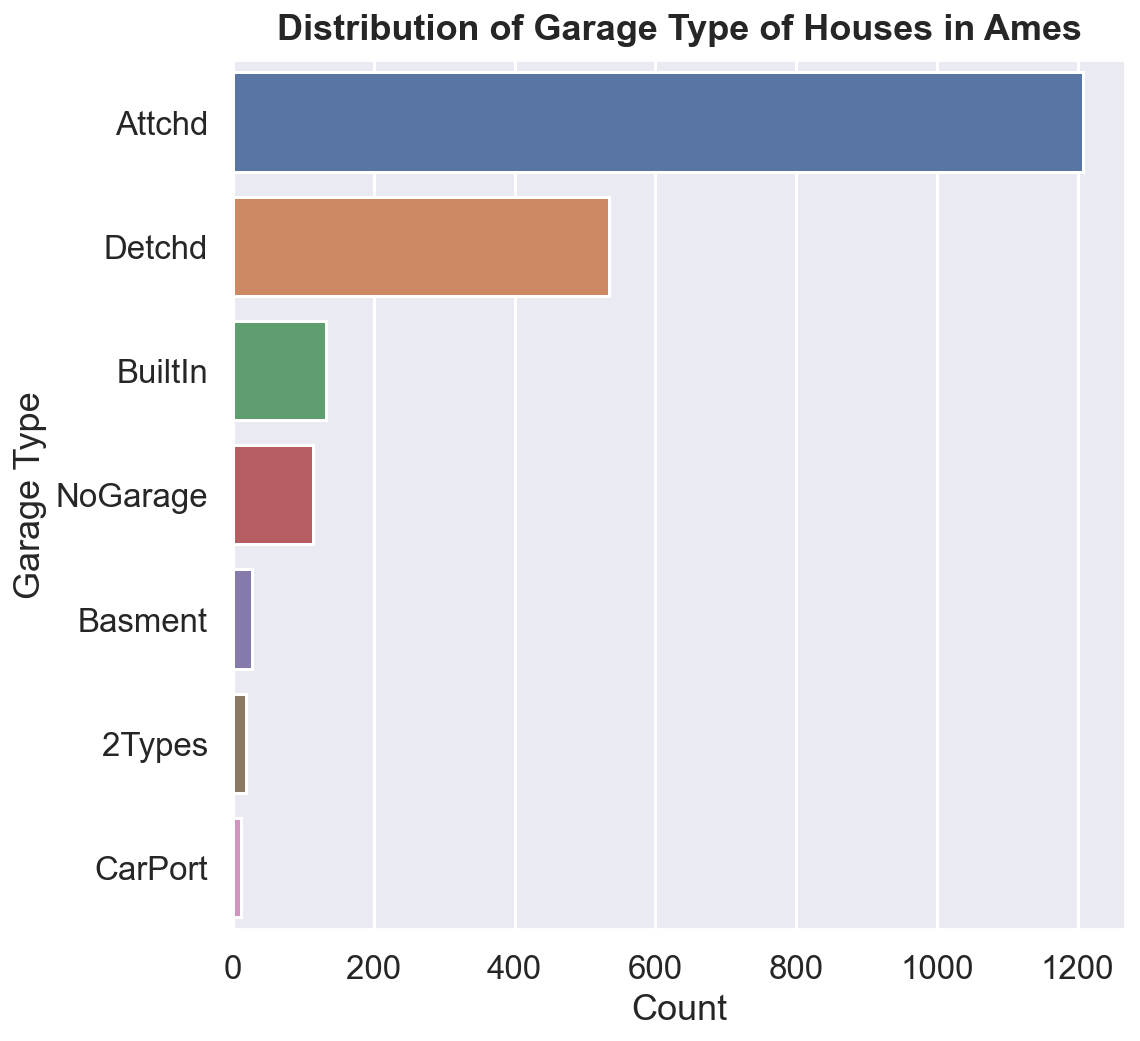

In [83]:
g = sns.countplot(y='garage_type', 
                  data=train, 
                  order=train['garage_type'].value_counts().sort_values(ascending=False).index)
g.figure.set_size_inches(8, 8)
g.set_xlabel('Count')
g.set_ylabel('Garage Type')
g.set_title('Distribution of Garage Type of Houses in Ames', weight='bold', pad=10);

Attached garages are the most popular.

## Bivariate analysis

Below is a correlation heatmap for the numeric variables with sale price:

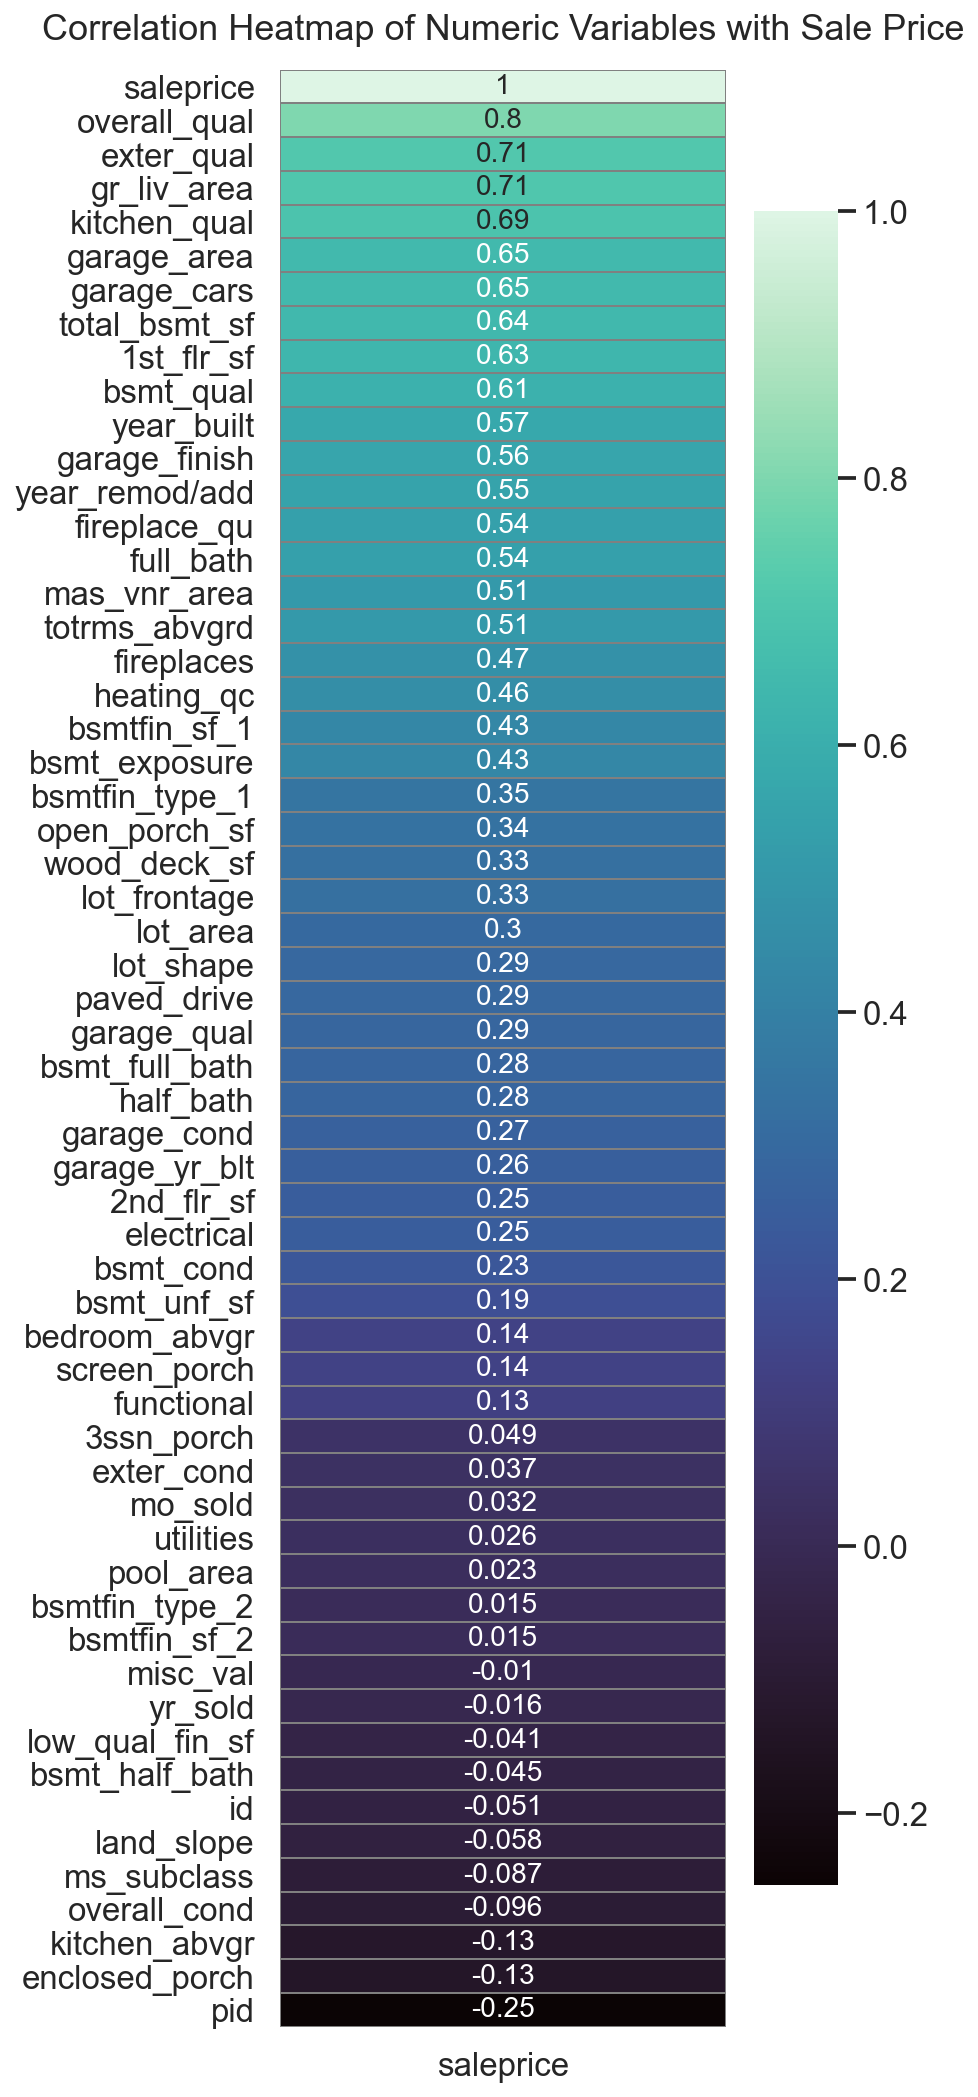

In [84]:
plt.figure(figsize=(5,18))
sns.heatmap(train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
            annot=True,
            annot_kws={'size': 14},
            linewidths=1,
            linecolor='grey',
            cmap='mako').set_title('Correlation Heatmap of Numeric Variables with Sale Price',
                                   fontsize=18,
                                   pad=15);

Here, we can see that the overall quality and external quality are the most correlated with sale price out of the numeric features. We can also see that several area-related features have high correlations with sale price as well. On the other end of the spectrum, we do not see any negative values.

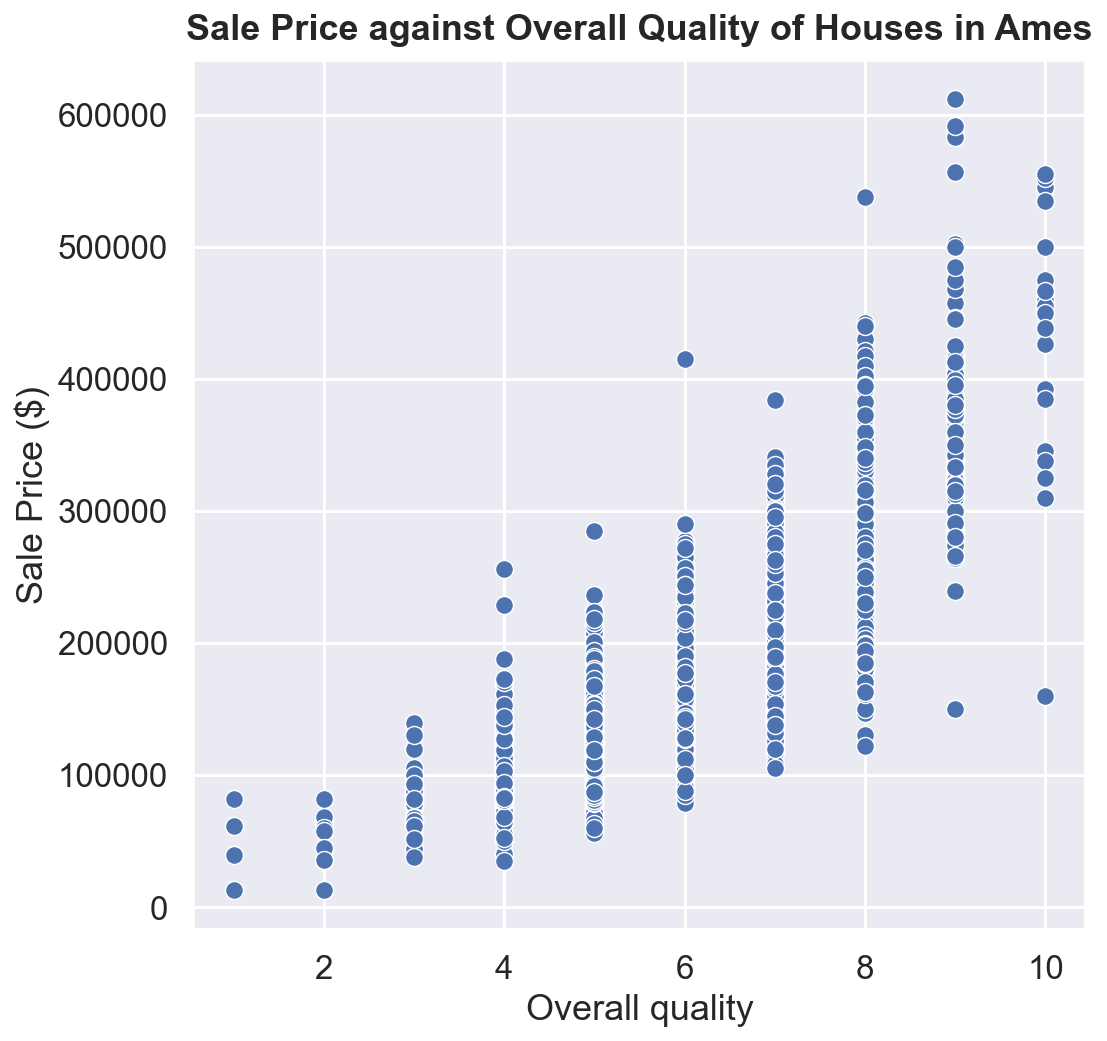

In [85]:
g = sns.scatterplot(x='overall_qual',
                    y='saleprice', 
                    data=train)
g.figure.set_size_inches(8, 8)
g.set_xlabel('Overall quality')
g.set_ylabel('Sale Price ($)')
g.set_title('Sale Price against Overall Quality of Houses in Ames', weight='bold', pad=10);

Here we see overall quality, the feature with the highest correlation (r=0.8) with sale price. There is a trend that can be clearly seen visually.

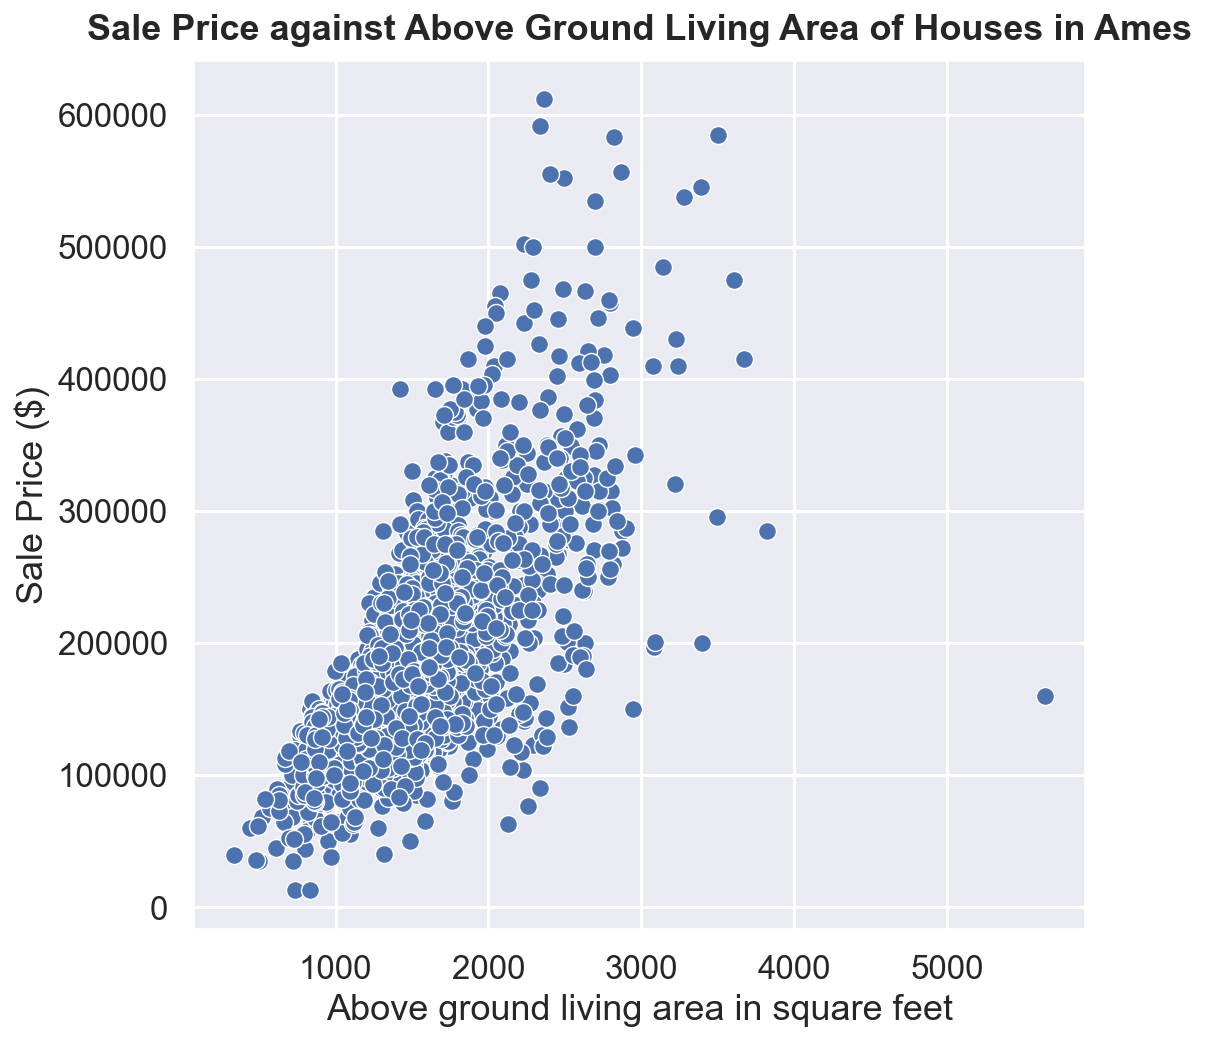

In [86]:
g = sns.scatterplot(x='gr_liv_area',
                    y='saleprice', 
                    data=train)
g.figure.set_size_inches(8, 8)
g.set_xlabel('Above ground living area in square feet')
g.set_ylabel('Sale Price ($)')
g.set_title('Sale Price against Above Ground Living Area of Houses in Ames', weight='bold', pad=10);

The above ground living area has a correlation of r=0.71 with sale price. There is also a clear visual trend. However, there seems to be an extreme outlier with a very large area. In a subsequent step, the entry will be removed. 

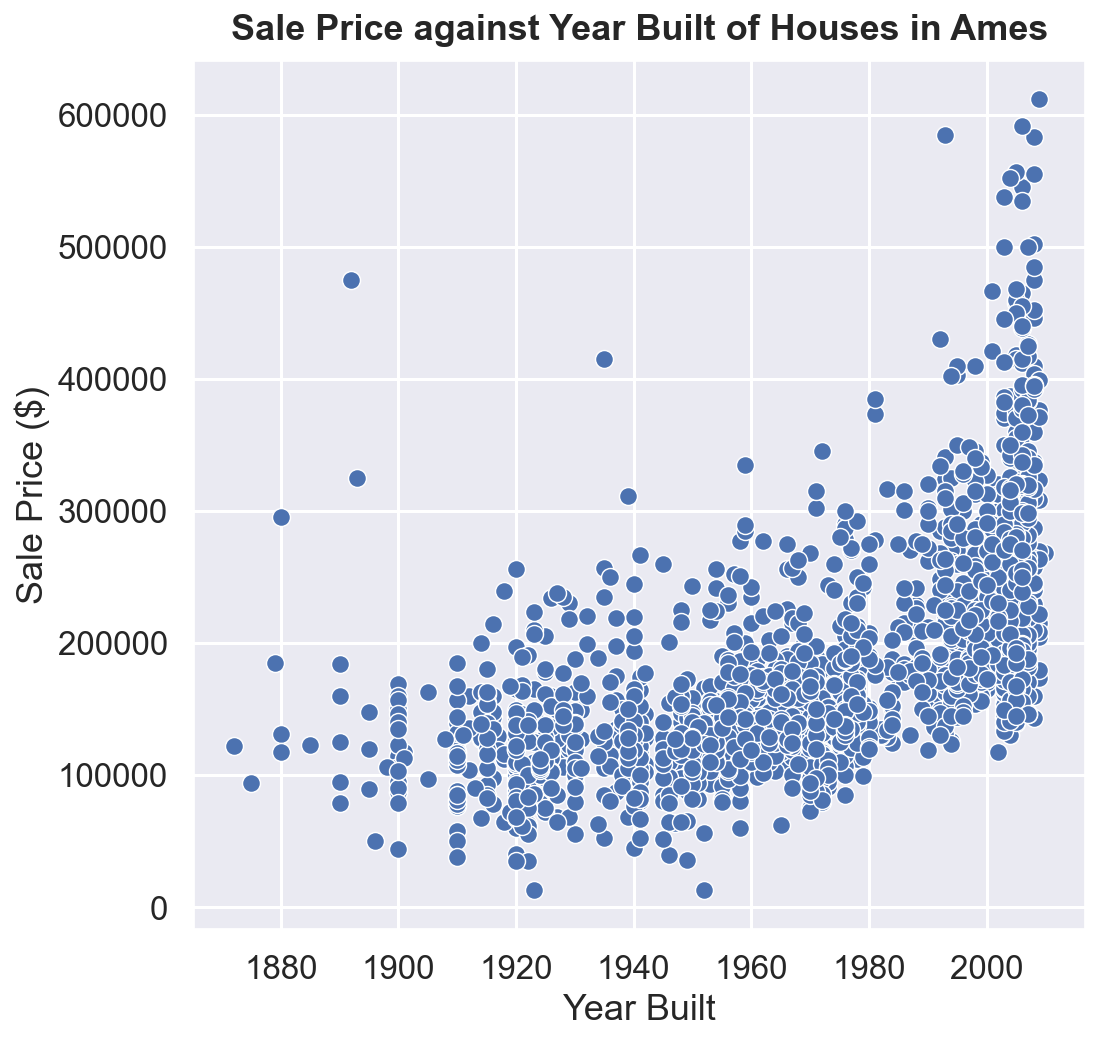

In [87]:
g = sns.scatterplot(x='year_built',
                    y='saleprice', 
                    data=train)
g.figure.set_size_inches(8, 8)
g.set_xlabel('Year Built')
g.set_ylabel('Sale Price ($)')
g.set_title('Sale Price against Year Built of Houses in Ames', weight='bold', pad=10);

Here, we can see that many of the houses sold for the most amount of money were built after the year 2000.

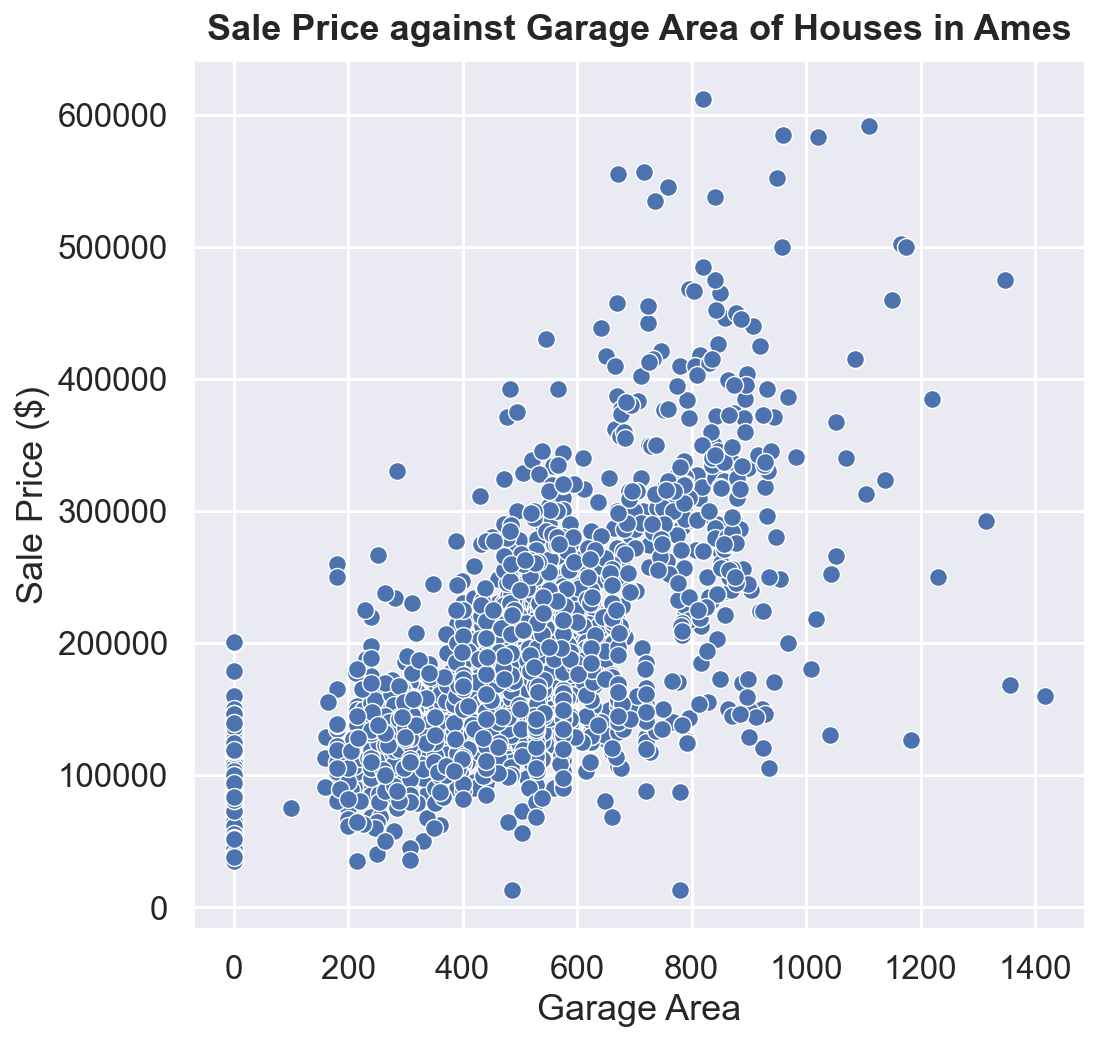

In [88]:
g = sns.scatterplot(x='garage_area',
                    y='saleprice', 
                    data=train)
g.figure.set_size_inches(8, 8)
g.set_xlabel('Garage Area')
g.set_ylabel('Sale Price ($)')
g.set_title('Sale Price against Garage Area of Houses in Ames', weight='bold', pad=10);

We can see in this case that houses with a larger garage area have a larger sale price. There is a correlation of r=0.65 with sale price. We can also see a cluster of houses with no garage at the bottom left of the plot.

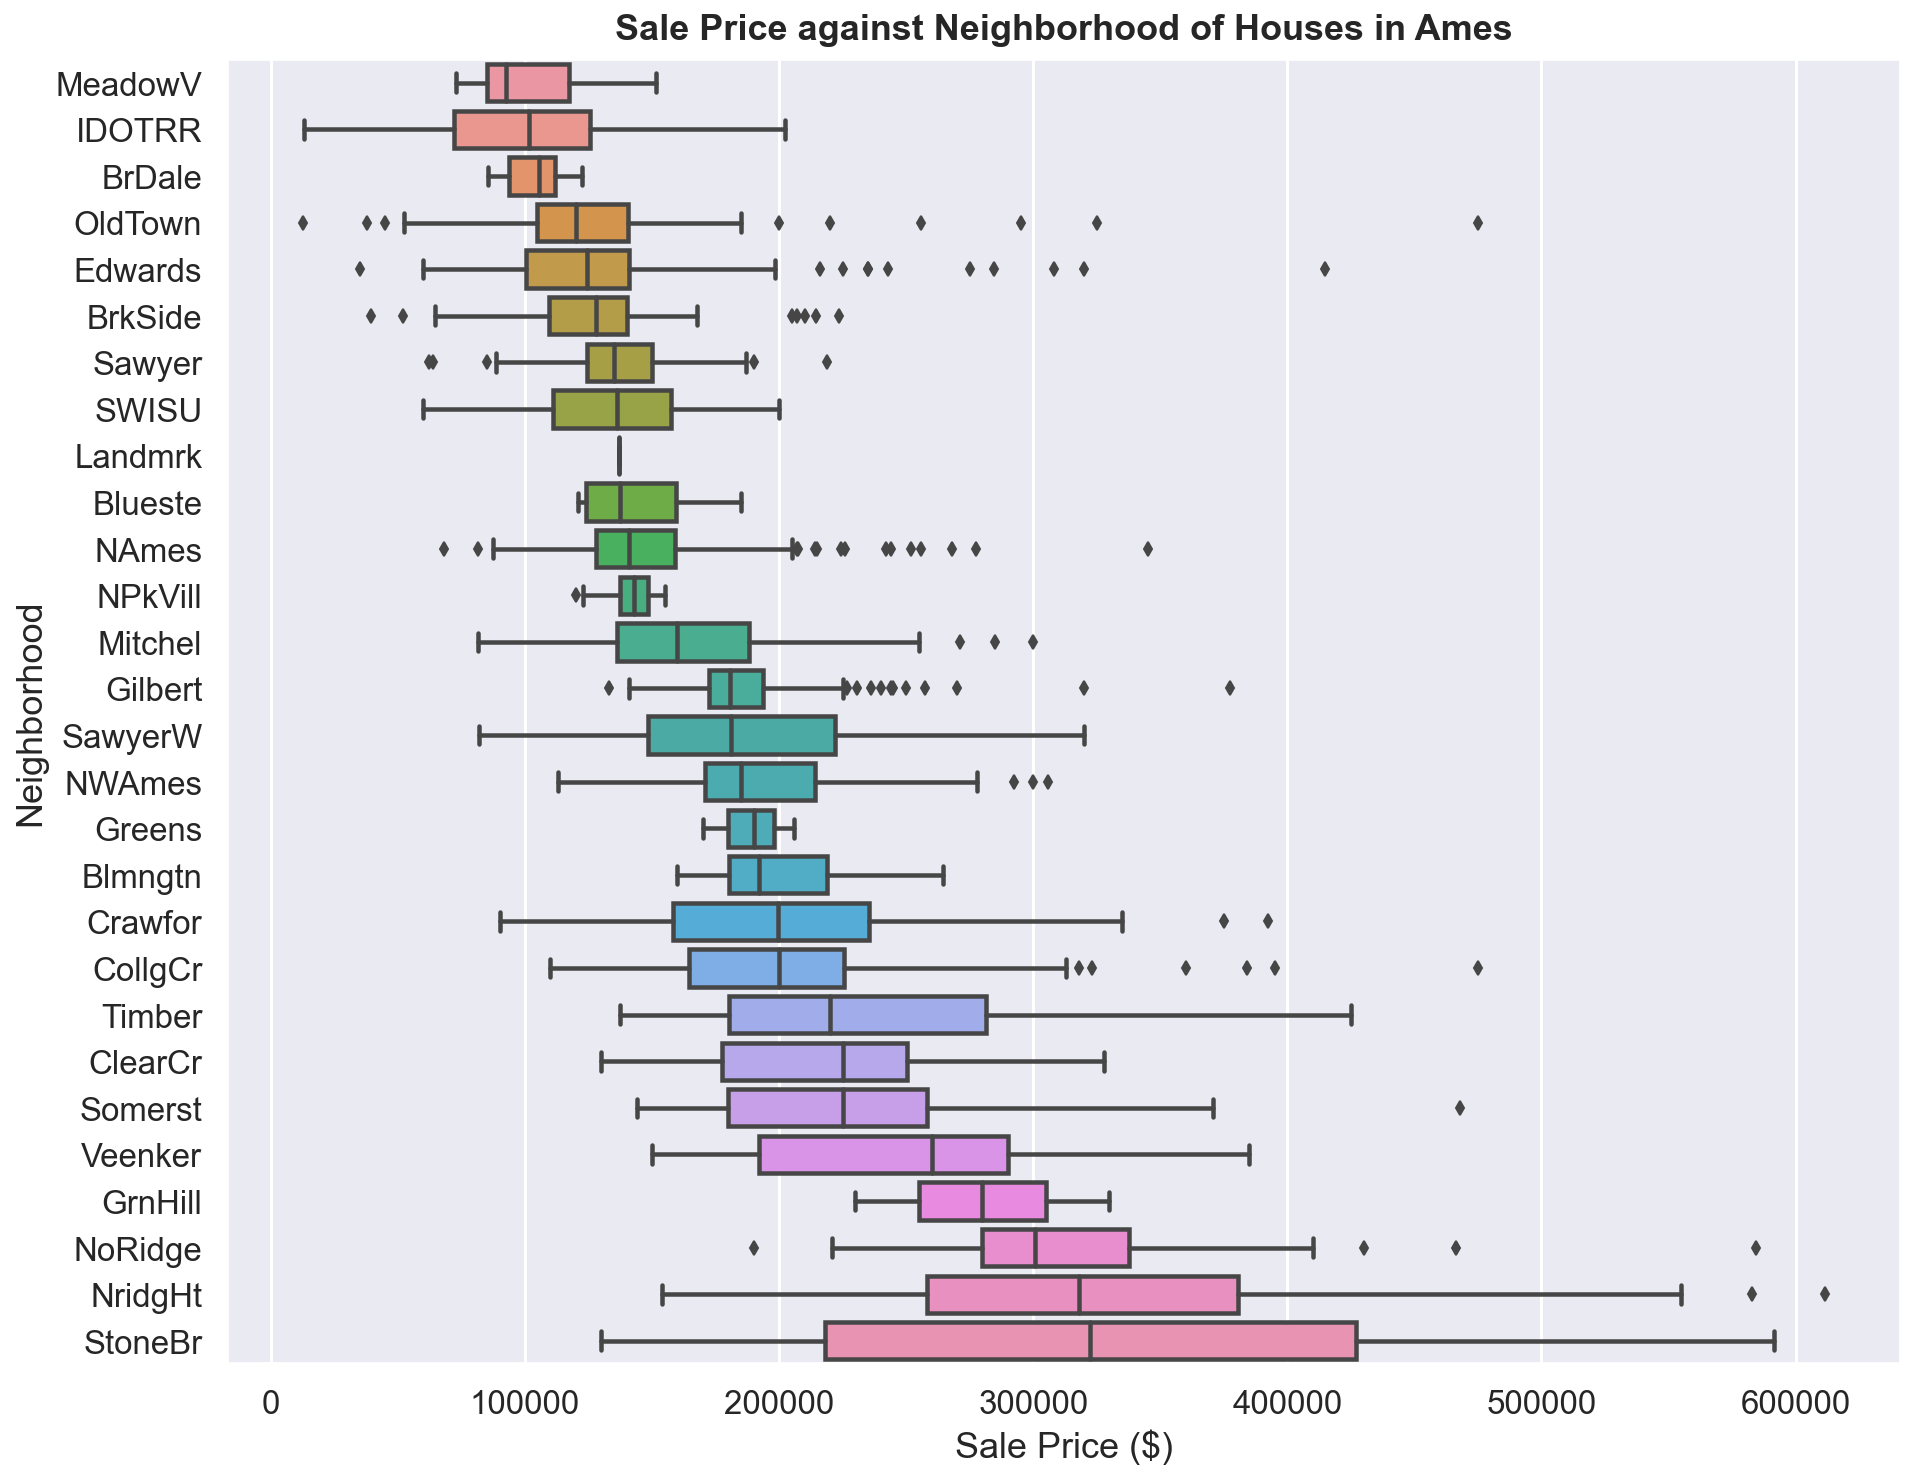

In [89]:
# Gets a list of neighbourhoods sorted by their median sale price in ascending order - for the boxplot
neighborhood_list = train['saleprice'].groupby(by=train['neighborhood']).median().sort_values().index

# Plots the boxplot
g = sns.boxplot(y='neighborhood',
                x='saleprice',
                data=train,
                order=neighborhood_list,
                orient='h')
g.figure.set_size_inches(15, 12)
g.set_xlabel('Sale Price ($)')
g.set_ylabel('Neighborhood')
g.set_title('Sale Price against Neighborhood of Houses in Ames', weight='bold', pad=10);

North Ames (NAmes) was the neighbourhood with the highest house count as seen in the [Univariate analysis - categorical](#Univariate-analysis---categorical) section. It is not among the neighbourhoods with the higher sale prices here. In contrast, Stone Brook (StoneBr) had one of the lower house counts among the neighbourhoods, but the most expensive houses are located there. 

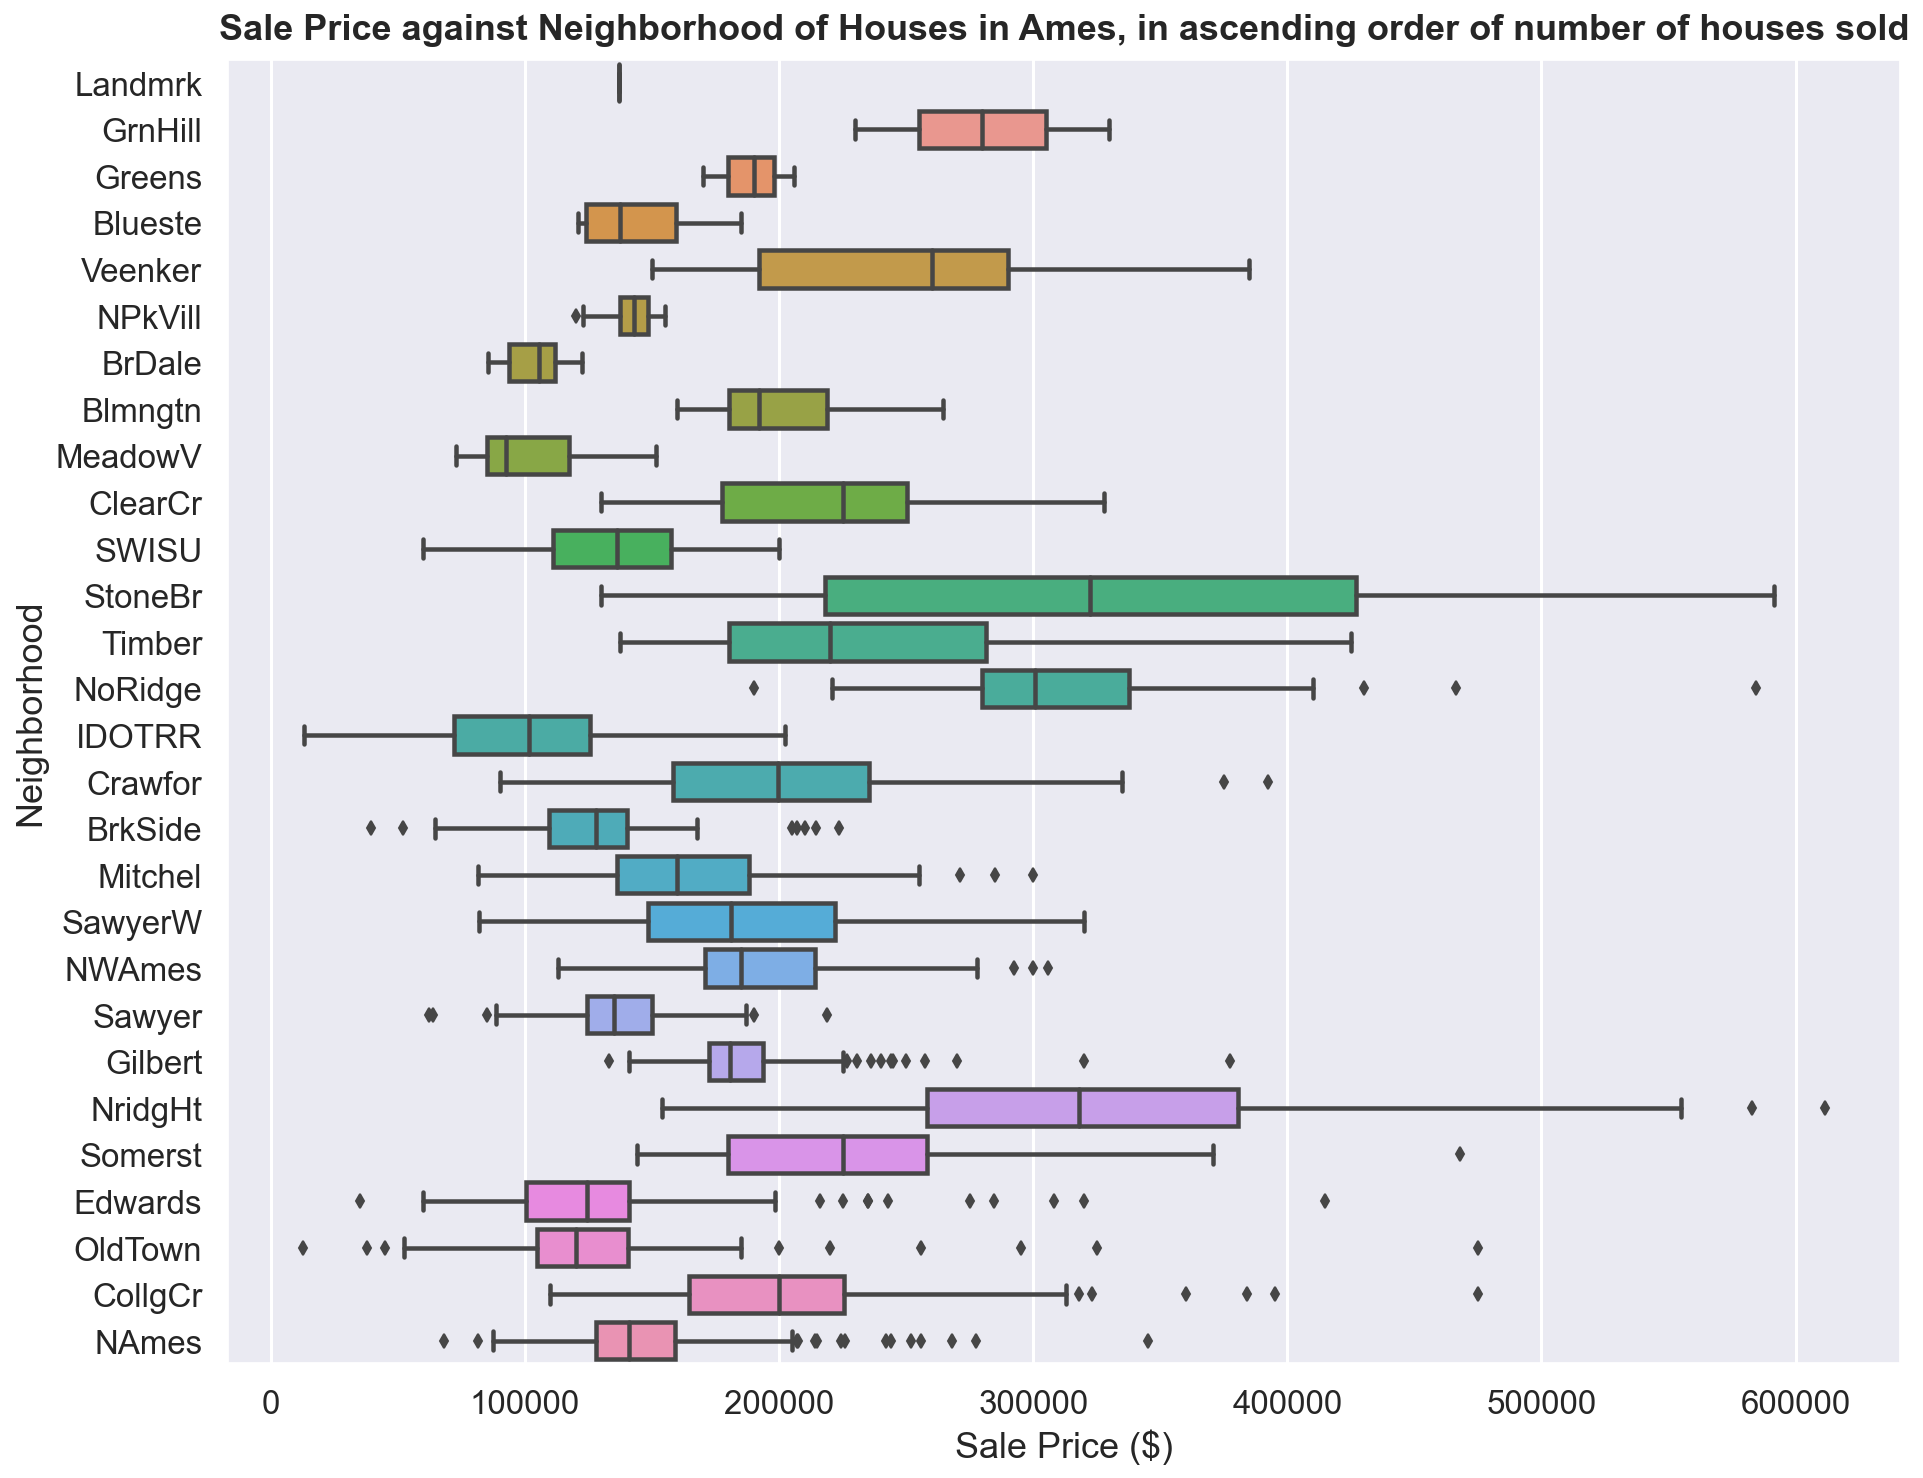

In [90]:
# Gets a list of neighbourhoods sorted by their median sale price in ascending order - for the boxplot
neighborhood_list = train['saleprice'].groupby(by=train['neighborhood']).count().sort_values().index

# Plots the boxplot
g = sns.boxplot(y='neighborhood',
                x='saleprice',
                data=train,
                order=neighborhood_list,
                orient='h')
g.figure.set_size_inches(15, 12)
g.set_xlabel('Sale Price ($)')
g.set_ylabel('Neighborhood')
g.set_title('Sale Price against Neighborhood of Houses in Ames, in ascending order of number of houses sold', 
            weight='bold', 
            pad=10);

If we change the plot to indicate the count of houses in the neighbourhood, we see that neither the neighborhoods with the largest or the smallest counts had the highest sale prices.

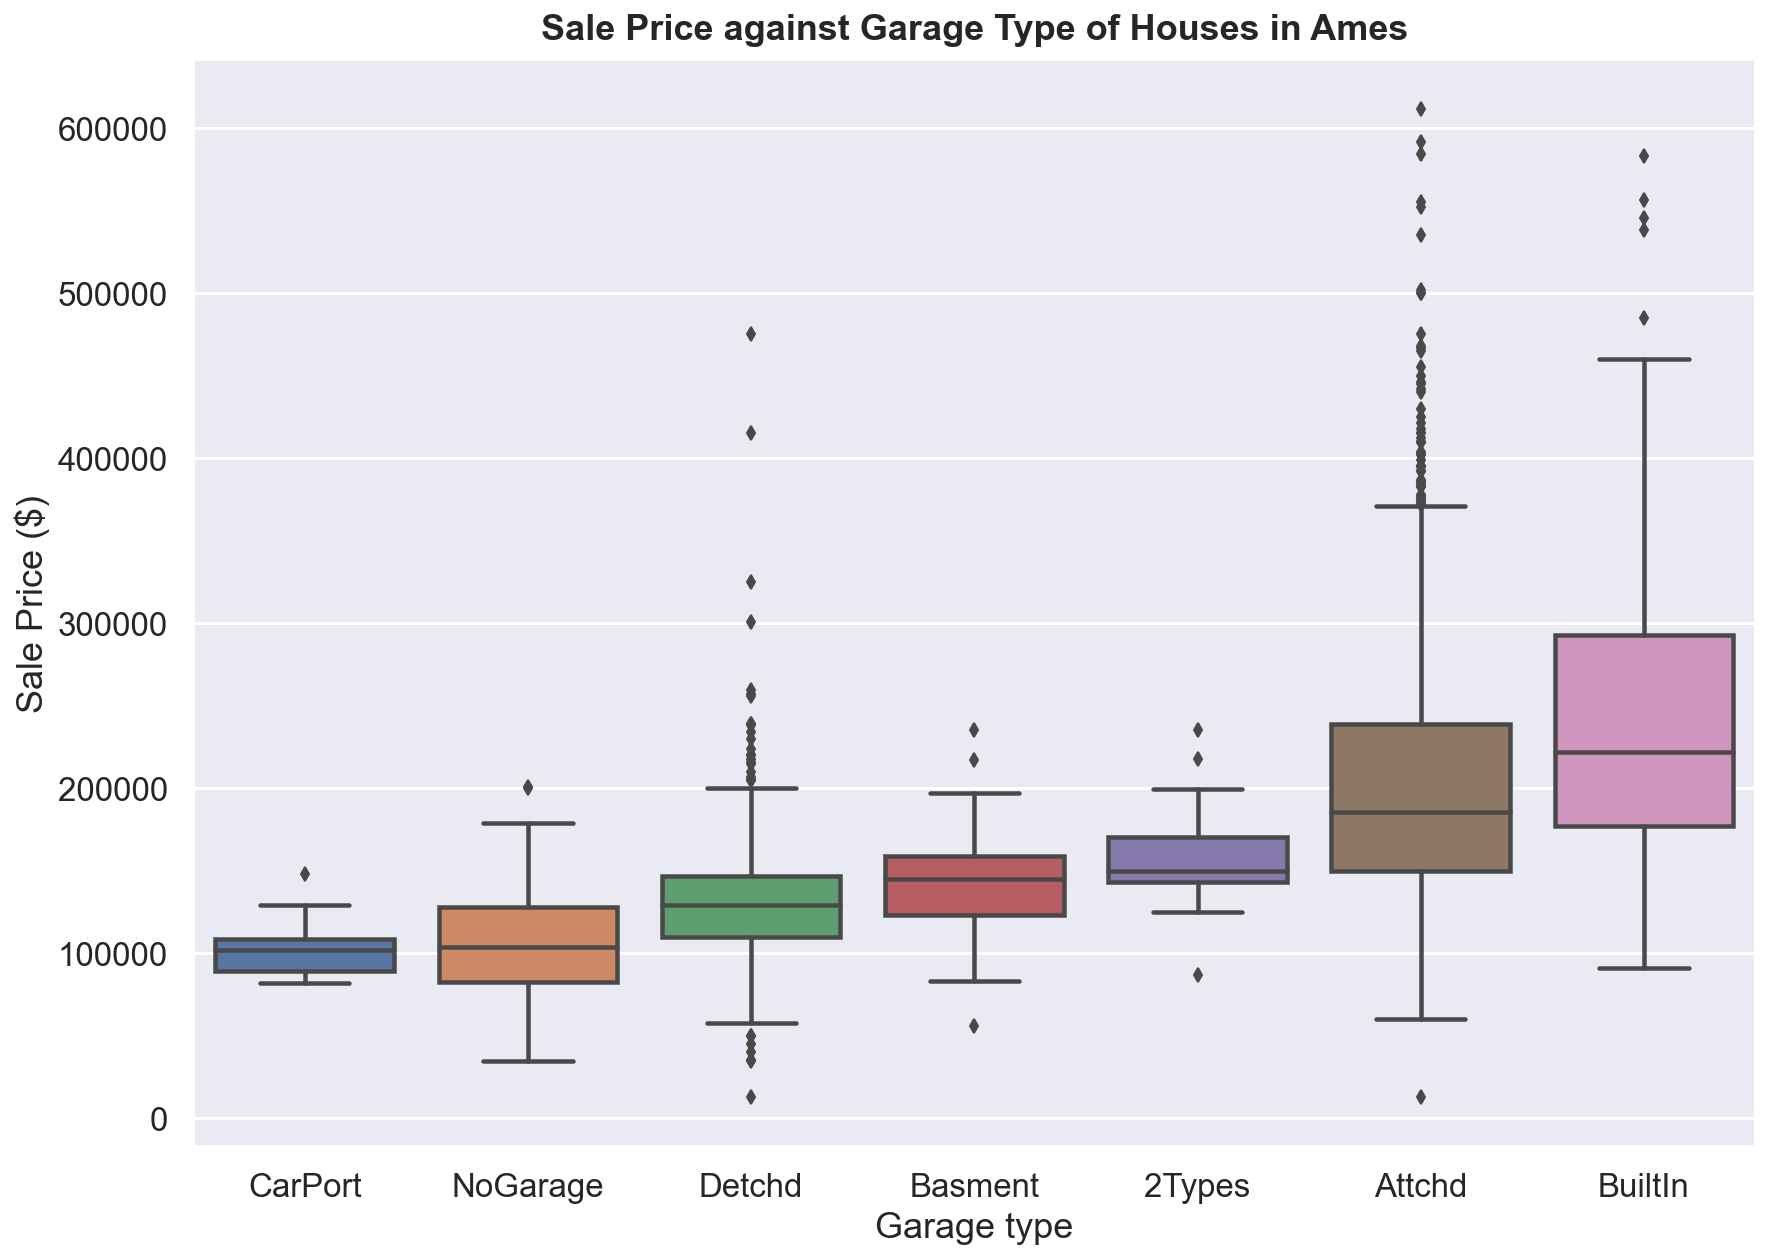

In [91]:
# Gets a list of garage types sorted by their median sale price in ascending order - to order the boxplot
garage_list = train['saleprice'].groupby(by=train['garage_type']).median().sort_values().index

# Plots the boxplot
g = sns.boxplot(x='garage_type',
                y='saleprice',
                data=train,
                order=garage_list)
g.figure.set_size_inches(14, 10)
g.set_xlabel('Garage type')
g.set_ylabel('Sale Price ($)')
g.set_title('Sale Price against Garage Type of Houses in Ames', weight='bold', pad=10);

Attached was the most common type, as seen in the [Univariate analysis - categorical](#Univariate-analysis---categorical) section. Built-in garages were not common. Here, we see however that built-in garages are associated with higher sale prices.

Given that there are a number of features exhibiting a linear relationship with sale price, the provided data should be able to be used as a base to build a model and answer the problem statement.

The subsequent part of the project (Feature engineering onwards) will be continued in the next notebook. The DataFrame which has been cleaned of NaN values will be saved to a .csv file:

In [92]:
train.to_csv('../data/train_cleaned.csv', index=False)

-- End of Notebook -- 